<a href="https://www.kaggle.com/code/nooralrajab/arrhythmia-classificaiton-ipynb?scriptVersionId=223313572" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
with_ppg=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input/challenge2015-reducing-false-arrhythmia/Challenge2015_csv/'):
    for filename in filenames:
        if(filename!="ALARMS"):
            if("PLETH" in pd.read_csv(dirname+filename).columns):
                with_ppg.append(filename[0:-4])

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Start with 2015 dataset and remove samples with asystole

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df=pd.read_csv("/kaggle/input/challenge2015-reducing-false-arrhythmia/Challenge2015_csv/ALARMS", names=["Sample", "Label", "TrueAlarm"])
df_relevant=df.loc[df["Label"]!="Asystole"].copy()
df_relevant

Sample                    Label  TrueAlarm
0    v100s  Ventricular_Tachycardia          0
1    v101l  Ventricular_Tachycardia          0
2    v102s  Ventricular_Tachycardia          0
6    t106s              Tachycardia          1
7    t107l              Tachycardia          1
..     ...                      ...        ...
744  v844s  Ventricular_Tachycardia          1
745  v845l  Ventricular_Tachycardia          0
746  v846s  Ventricular_Tachycardia          0
748  v848s  Ventricular_Tachycardia          0
749  b849l              Bradycardia          0

[628 rows x 3 columns]

## Remove samples without PPG

In [3]:
df_filtered=df_relevant.loc[df_relevant["Sample"].isin(with_ppg)].copy()
df_filtered

Sample                    Label  TrueAlarm
0    v100s  Ventricular_Tachycardia          0
1    v101l  Ventricular_Tachycardia          0
2    v102s  Ventricular_Tachycardia          0
6    t106s              Tachycardia          1
7    t107l              Tachycardia          1
..     ...                      ...        ...
740  b840s              Bradycardia          1
743  v843l  Ventricular_Tachycardia          0
746  v846s  Ventricular_Tachycardia          0
748  v848s  Ventricular_Tachycardia          0
749  b849l              Bradycardia          0

[521 rows x 3 columns]

## Adding a path column

In [4]:
df_filtered["Path"]=["/kaggle/input/challenge2015-reducing-false-arrhythmia/Challenge2015_csv/"+x+".csv" for x in df_filtered["Sample"]]
df_filtered

Sample                    Label  TrueAlarm  \
0    v100s  Ventricular_Tachycardia          0   
1    v101l  Ventricular_Tachycardia          0   
2    v102s  Ventricular_Tachycardia          0   
6    t106s              Tachycardia          1   
7    t107l              Tachycardia          1   
..     ...                      ...        ...   
740  b840s              Bradycardia          1   
743  v843l  Ventricular_Tachycardia          0   
746  v846s  Ventricular_Tachycardia          0   
748  v848s  Ventricular_Tachycardia          0   
749  b849l              Bradycardia          0   

                                                  Path  
0    /kaggle/input/challenge2015-reducing-false-arr...  
1    /kaggle/input/challenge2015-reducing-false-arr...  
2    /kaggle/input/challenge2015-reducing-false-arr...  
6    /kaggle/input/challenge2015-reducing-false-arr...  
7    /kaggle/input/challenge2015-reducing-false-arr...  
..                                                 ...  
740  /kaggle/input/challenge2015-reducing-false-arr...  
743  /kaggle/input/challenge2015-reducing-false-arr...  
746  /kaggle/input/challenge2015-reducing-false-arr...  
748  /kaggle/input/challenge2015-reducing-false-arr...  
749  /kaggle/input/challenge2015-reducing-false-arr...  

[521 rows x 4 columns]

## Get paths and sample names from A-Fib dataset

In [5]:
afib_paths=[]
healthy_paths=[]
afib_samples=[]
healthy_samples=[]

for dirname, _, filenames in os.walk('/kaggle/input/mimic-perform-af-dataset/mimic_perform_af_csv/mimic_perform_af_csv'):
    for filename in filenames:
        if("csv" in filename):
            afib_paths.append(dirname+"/"+filename)
            filename_split=filename.split("_")
            afib_samples.append(filename_split[2]+"_"+filename_split[3])

for dirname, _, filenames in os.walk('/kaggle/input/mimic-perform-af-dataset/mimic_perform_non_af_csv/mimic_perform_non_af_csv'):
    for filename in filenames:
        if("csv" in filename):
            healthy_paths.append(dirname+"/"+filename)
            filename_split=filename.split("_")
            healthy_samples.append(filename_split[2]+"_"+filename_split[3]+"_"+filename_split[4])

In [6]:
afib_df=pd.DataFrame({"Sample":afib_samples,
        "Label":19*["Atrial_Fibrillation"],
        "TrueAlarm":19*[True],
        "Path":afib_paths})

healthy_df=pd.DataFrame({"Sample":healthy_samples,
        "Label":16*["Healthy"],
        "TrueAlarm":16*[True],
        "Path":healthy_paths})

df_filtered=pd.concat([df_filtered, afib_df, healthy_df])
df_filtered

Sample                    Label  TrueAlarm  \
0        v100s  Ventricular_Tachycardia          0   
1        v101l  Ventricular_Tachycardia          0   
2        v102s  Ventricular_Tachycardia          0   
6        t106s              Tachycardia          1   
7        t107l              Tachycardia          1   
..         ...                      ...        ...   
11  non_af_012                  Healthy          1   
12  non_af_003                  Healthy          1   
13  non_af_004                  Healthy          1   
14  non_af_001                  Healthy          1   
15  non_af_013                  Healthy          1   

                                                 Path  
0   /kaggle/input/challenge2015-reducing-false-arr...  
1   /kaggle/input/challenge2015-reducing-false-arr...  
2   /kaggle/input/challenge2015-reducing-false-arr...  
6   /kaggle/input/challenge2015-reducing-false-arr...  
7   /kaggle/input/challenge2015-reducing-false-arr...  
..                                                ...  
11  /kaggle/input/mimic-perform-af-dataset/mimic_p...  
12  /kaggle/input/mimic-perform-af-dataset/mimic_p...  
13  /kaggle/input/mimic-perform-af-dataset/mimic_p...  
14  /kaggle/input/mimic-perform-af-dataset/mimic_p...  
15  /kaggle/input/mimic-perform-af-dataset/mimic_p...  

[556 rows x 4 columns]

## Get statistics of how many waveforms are available for each condition

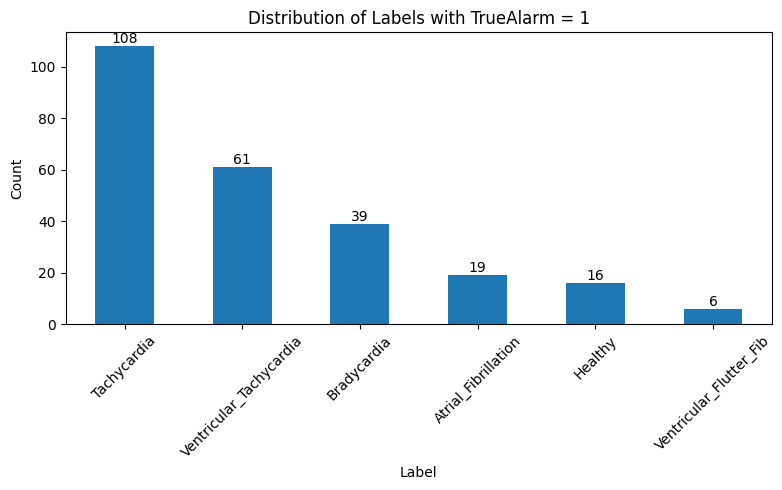

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df_filtered.loc[df_filtered["TrueAlarm"] == 1, "Label"].value_counts()

# Plot as a bar plot
label_counts.plot(kind="bar", figsize=(8, 5))
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels with TrueAlarm = 1")
plt.xticks(rotation=45)
plt.bar_label(plt.gca().containers[0])  # Add count labels on bars
plt.tight_layout()
plt.show()


## Resampling attempt: from 125 Hz to 250 Hz sampling frequency

In [8]:
import numpy as np

signal=pd.read_csv("/kaggle/input/mimic-perform-af-dataset/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_001_data.csv")["ECG"].values[0:100]

# Original ECG signal and sampling frequency
ecg_signal = np.array(signal)  # Replace with your ECG data
fs_original = 125  # Original sampling frequency
fs_new = 250  # New sampling frequency

# Create new time points
original_time = np.arange(len(ecg_signal)) / fs_original
new_time = np.arange(0, original_time[-1], 1/fs_new)

# Interpolate using the average of surrounding points
from scipy.interpolate import interp1d
interp_function = interp1d(original_time, ecg_signal, kind='linear')  # Linear interpolation
new_ecg_signal = interp_function(new_time)

# Output new signal
print("Resampled ECG Signal:", new_ecg_signal)


Resampled ECG Signal: [0.31445312 0.29980469 0.28515625 0.29296875 0.30078125 0.30273438
 0.3046875  0.29980469 0.29492188 0.29492188 0.29492188 0.29492188
 0.29492188 0.29785156 0.30078125 0.30078125 0.30078125 0.30273438
 0.3046875  0.30273438 0.30078125 0.30273438 0.3046875  0.30761719
 0.31054688 0.31054688 0.31054688 0.3125     0.31445312 0.31933594
 0.32421875 0.32421875 0.32421875 0.32421875 0.32421875 0.32421875
 0.32421875 0.33007812 0.3359375  0.3359375  0.3359375  0.3359375
 0.3359375  0.3359375  0.3359375  0.34082031 0.34570312 0.35058594
 0.35546875 0.35546875 0.35546875 0.35742188 0.359375   0.36230469
 0.36523438 0.37011719 0.375      0.37792969 0.38085938 0.38085938
 0.38085938 0.38574219 0.390625   0.39746094 0.40429688 0.40722656
 0.41015625 0.41308594 0.41601562 0.42089844 0.42578125 0.43066406
 0.43554688 0.44238281 0.44921875 0.45507812 0.4609375  0.46582031
 0.47070312 0.47558594 0.48046875 0.48242188 0.484375   0.48242188
 0.48046875 0.47753906 0.47460937 0.46191

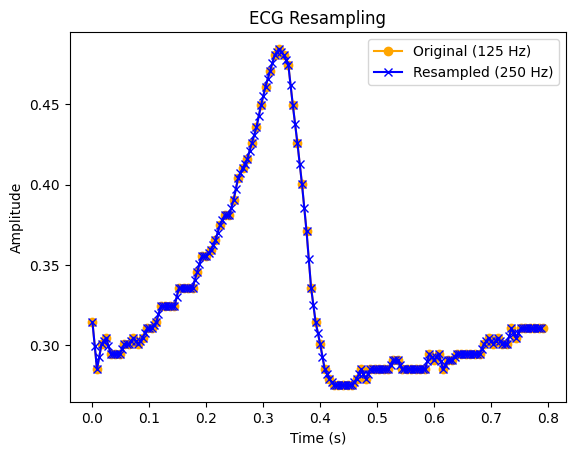

In [9]:
import matplotlib.pyplot as plt

plt.plot(original_time, ecg_signal, label="Original (125 Hz)", marker='o', color='orange')
plt.plot(new_time, new_ecg_signal, label="Resampled (250 Hz)", marker='x', color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("ECG Resampling")
plt.show()


## Resampling function

In [10]:
import numpy as np
from scipy.interpolate import interp1d

def resample(signal, fs_original=125, fs_new=250):
    # Original ECG signal and sampling frequency
    ecg_signal = np.array(signal)  # Replace with your ECG data
    
    # Create new time points
    original_time = np.arange(len(ecg_signal)) / fs_original
    new_time = np.arange(0, original_time[-1], 1/fs_new)
    
    # Interpolate using the average of surrounding points
    interp_function = interp1d(original_time, ecg_signal, kind='linear')  # Linear interpolation
    new_ecg_signal = interp_function(new_time)
    
    return new_ecg_signal


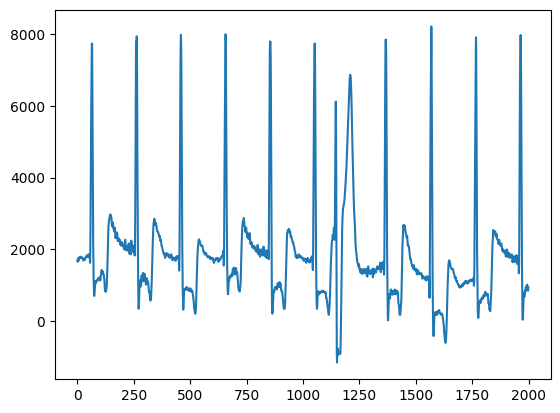

In [11]:
plt.plot(pd.read_csv(df_filtered.loc[(df_filtered["Label"]=="Ventricular_Tachycardia") & (df_filtered["TrueAlarm"]==1), "Path"].values[0])["II"].values[30000:32000])

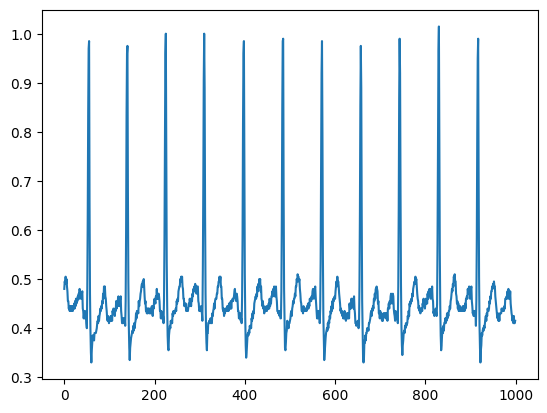

In [12]:
plt.plot(pd.read_csv(df_filtered.loc[df_filtered["Label"]=="Healthy", "Path"].values[0])["ECG"].values[70000:71000])

## getWaveform
A function that returns a single interval of the desired condition, signal type, offset, and duration. It also resamples if the source waveform has a sampling frequency of 125 instead of 250.

In [13]:
chunk_len=2048

def standardize(data):
    return ( data - np.mean(data) ) / np.std(data)

def getWaveform(label, index, sampleType, startPoint=0, duration=chunk_len, trueAlarm=1):
    if(label=="Atrial_Fibrillation" or label=="Healthy"):
        return resample(standardize(pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values[startPoint:startPoint+int(duration/2)]))
    else:
        if(sampleType=="ECG"):
            sampleType="II"
        elif(sampleType=="PPG"):
            sampleType="PLETH"
        try:
            return standardize(pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values[startPoint:startPoint+duration])
        except:
            return standardize(pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])["V"].values[startPoint:startPoint+duration])

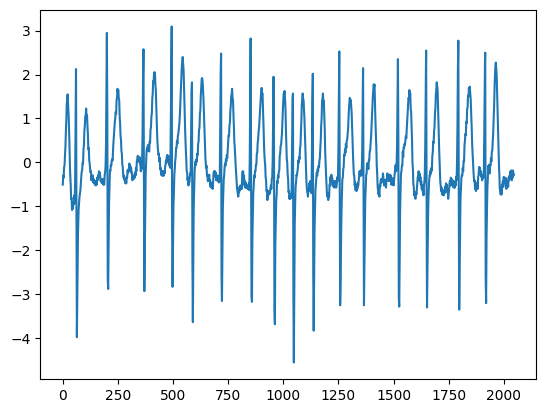

In [14]:
plt.plot(getWaveform("Atrial_Fibrillation", 0, "ECG"))

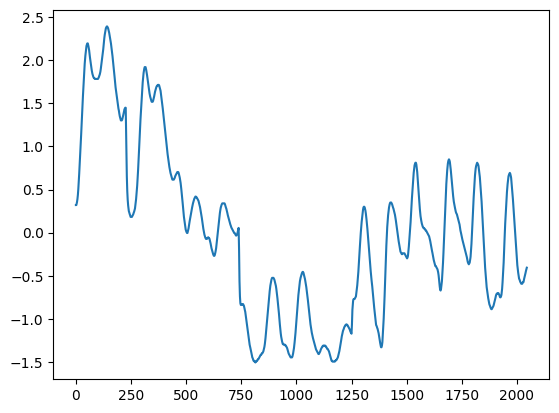

In [15]:
plt.plot(getWaveform("Atrial_Fibrillation", 0, "PPG"))

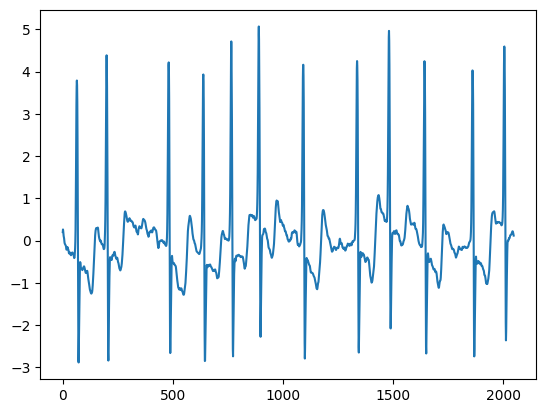

In [16]:
plt.plot(getWaveform("Ventricular_Flutter_Fib", 3, "ECG"))

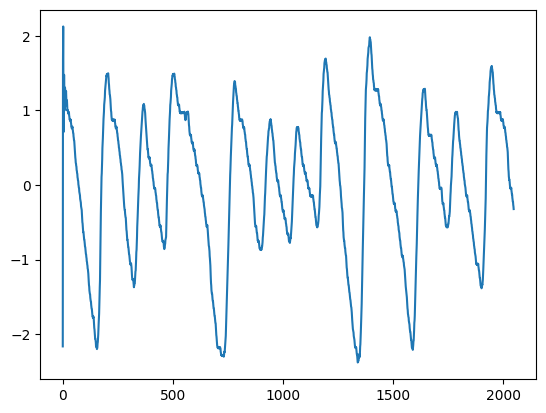

In [17]:
plt.plot(getWaveform("Ventricular_Flutter_Fib", 3, "PPG"))

## getWaveforms
A function that returns a **list** of intervals included in the full waveform.

In [18]:
def getWaveforms(label, index, sampleType, duration=chunk_len, trueAlarm=1):
    if(label=="Atrial_Fibrillation" or label=="Healthy"):
        fullWaveform = resample(pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values)
        periodsList=[]
        for i in range(int(np.floor(len(fullWaveform)/duration))):
            periodsList.append(fullWaveform[i*duration:(i*duration)+duration])
    else:
        if(sampleType=="ECG"):
            sampleType="II"
        elif(sampleType=="PPG"):
            sampleType="PLETH"
        try:
            fullWaveform = pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values
        except:
            fullWaveform = pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])["V"].values
        periodsList=[]
        for i in range(int(np.floor(len(fullWaveform)/duration))):
            periodsList.append(fullWaveform[i*duration:(i*duration)+duration])
    return periodsList

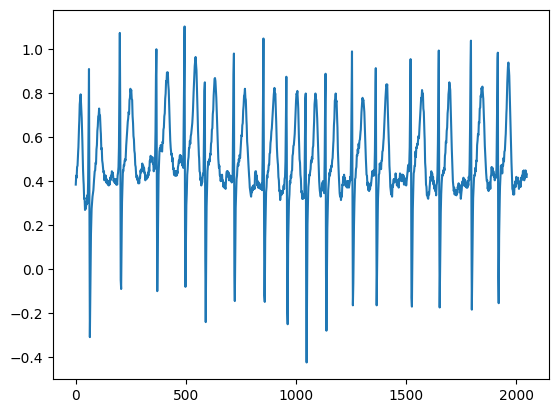

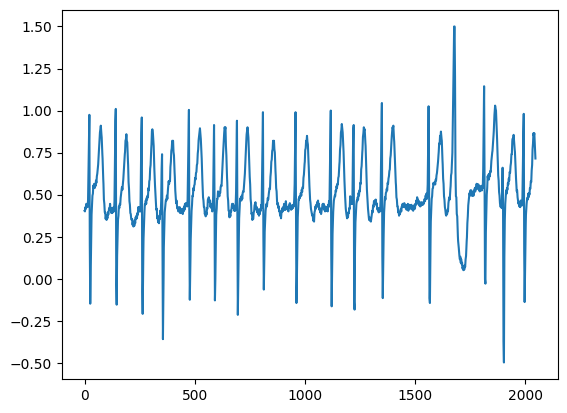

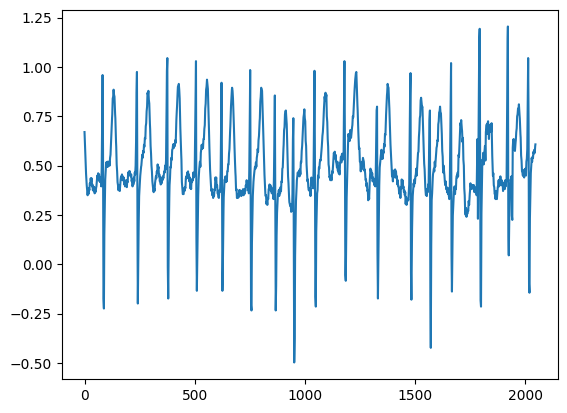

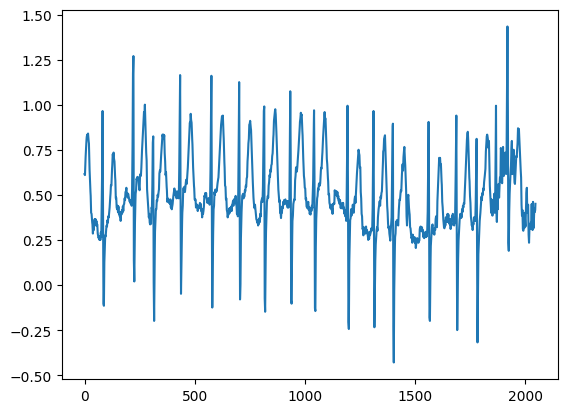

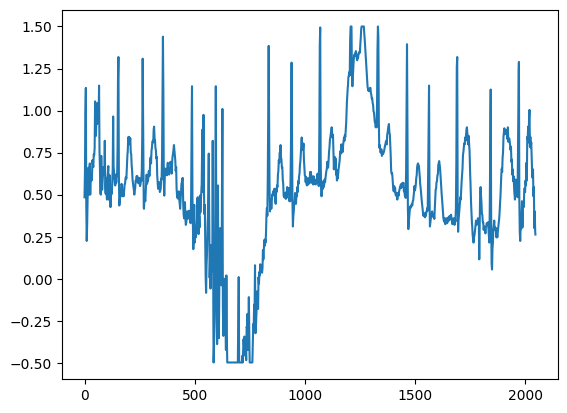

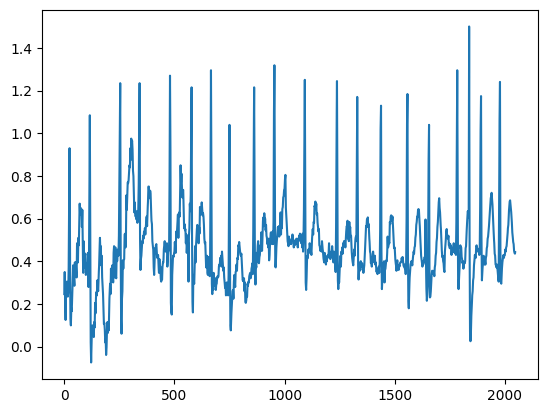

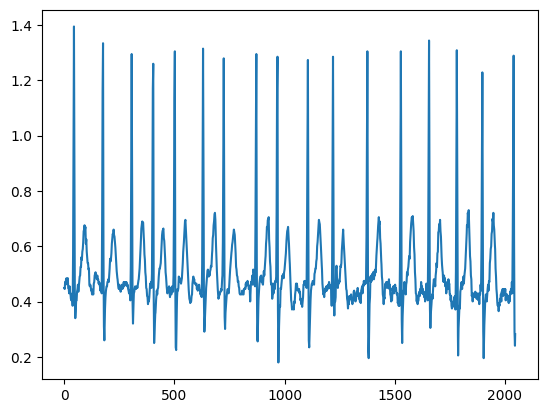

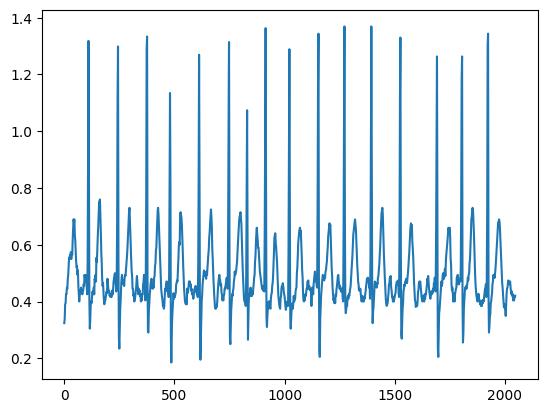

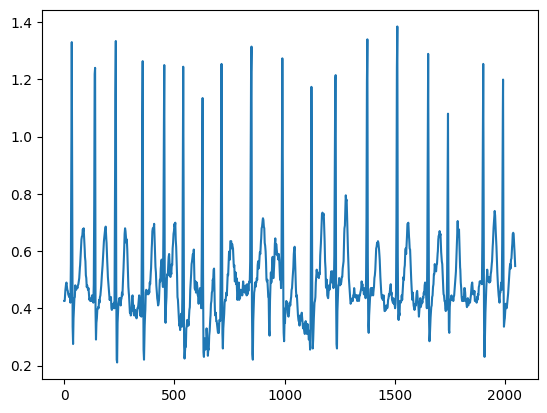

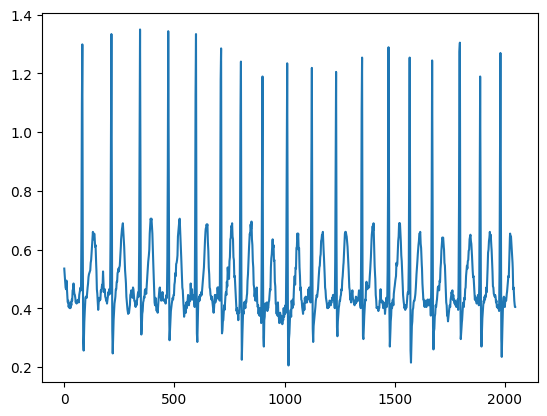

In [19]:
periods=getWaveforms("Atrial_Fibrillation", 0, "ECG")
for i in range(10):
    plt.plot(periods[i])
    plt.show()

## Plot FFT peaks

Ventricular_Flutter_Fib


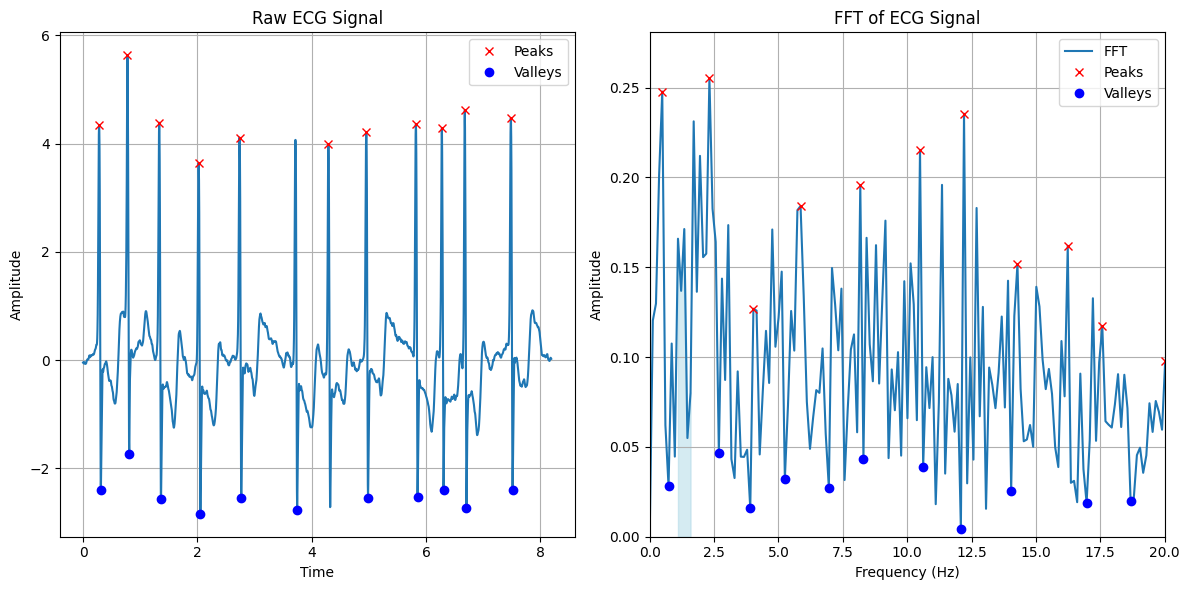

Ventricular_Flutter_Fib


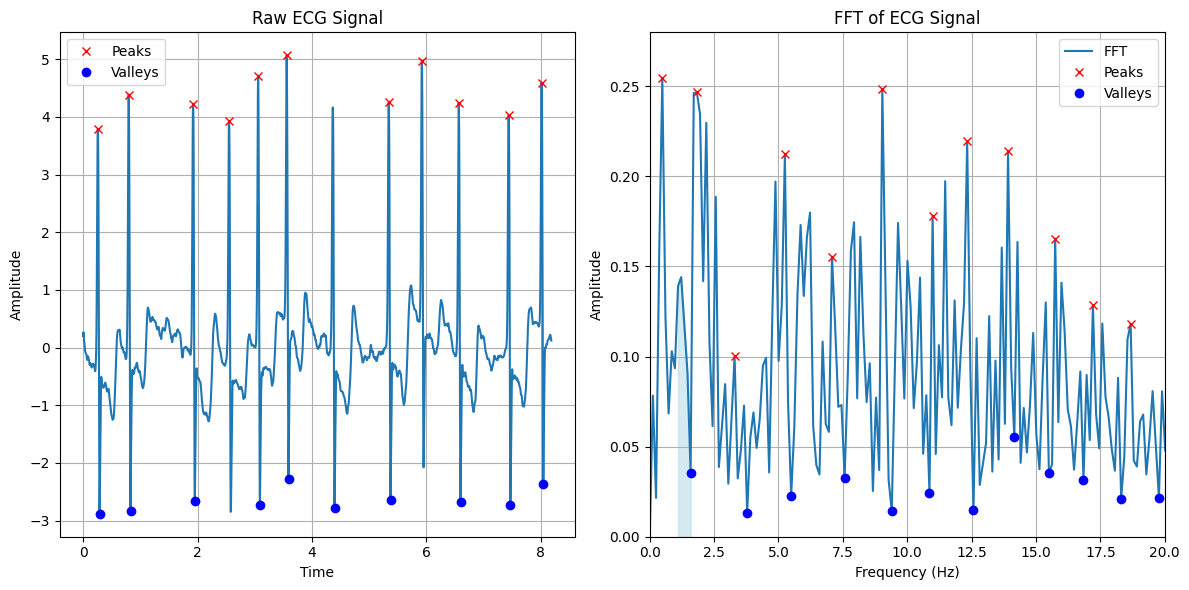

Ventricular_Tachycardia


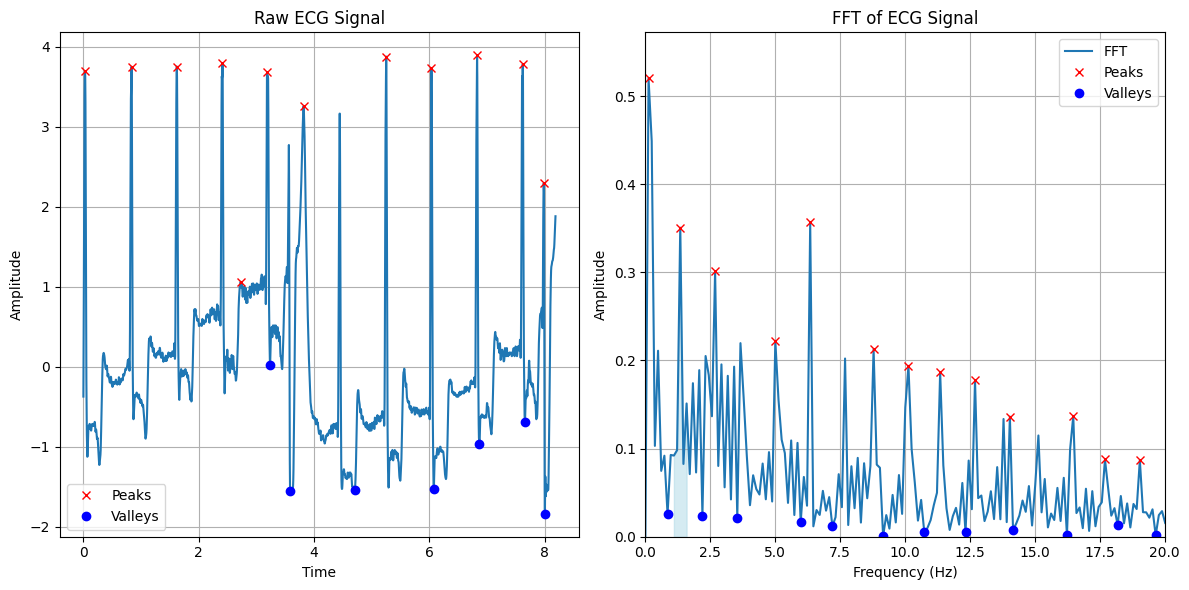

Ventricular_Tachycardia


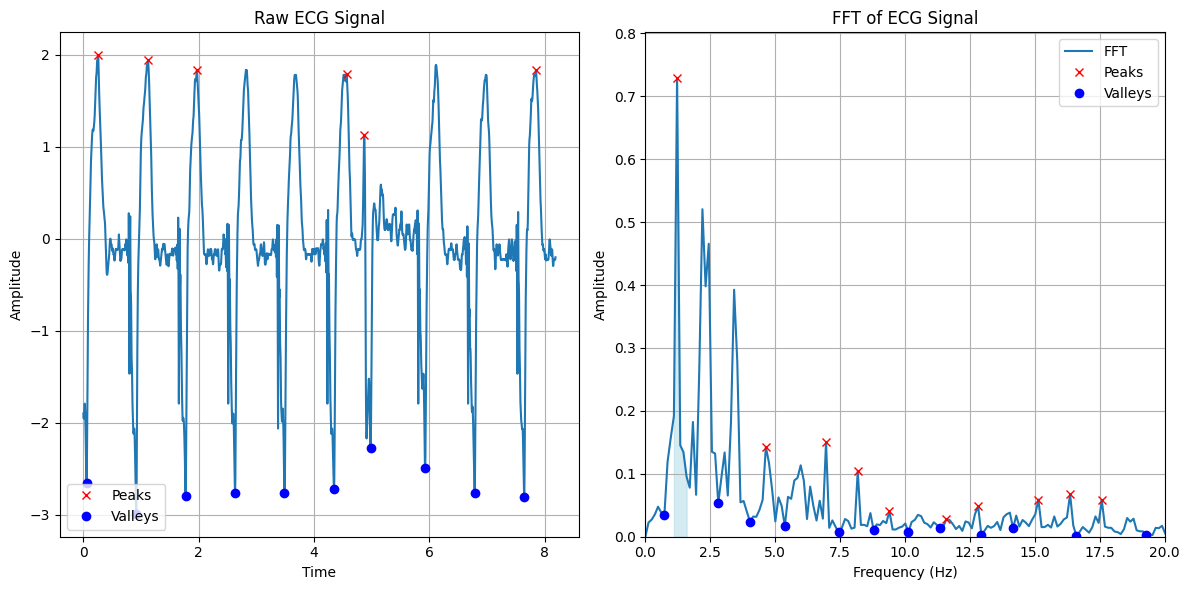

Tachy


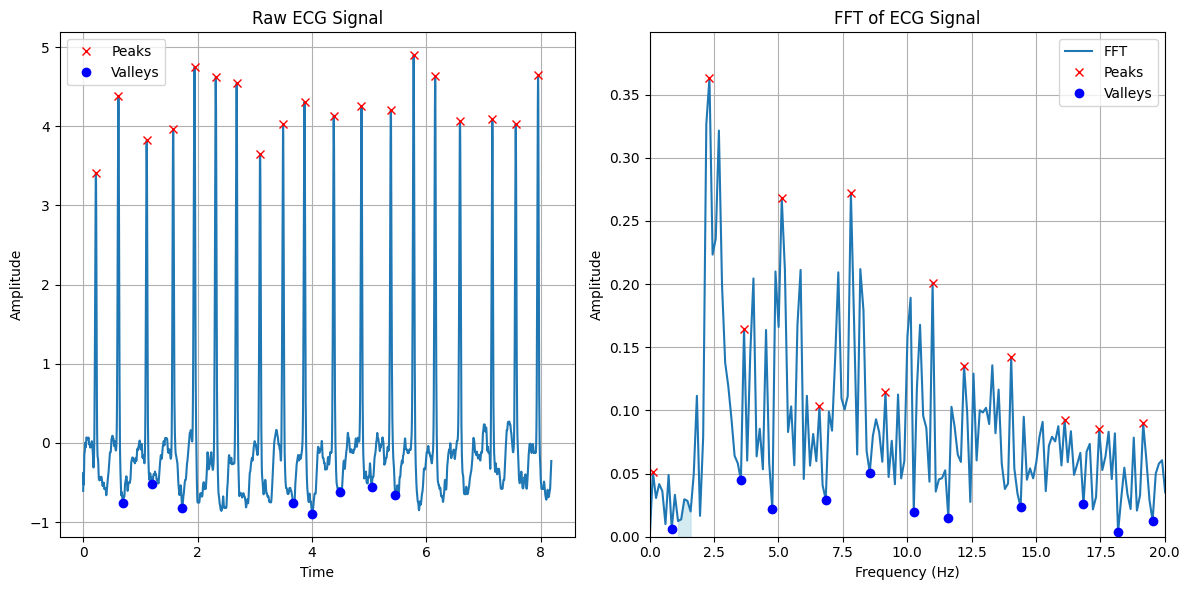

Brady


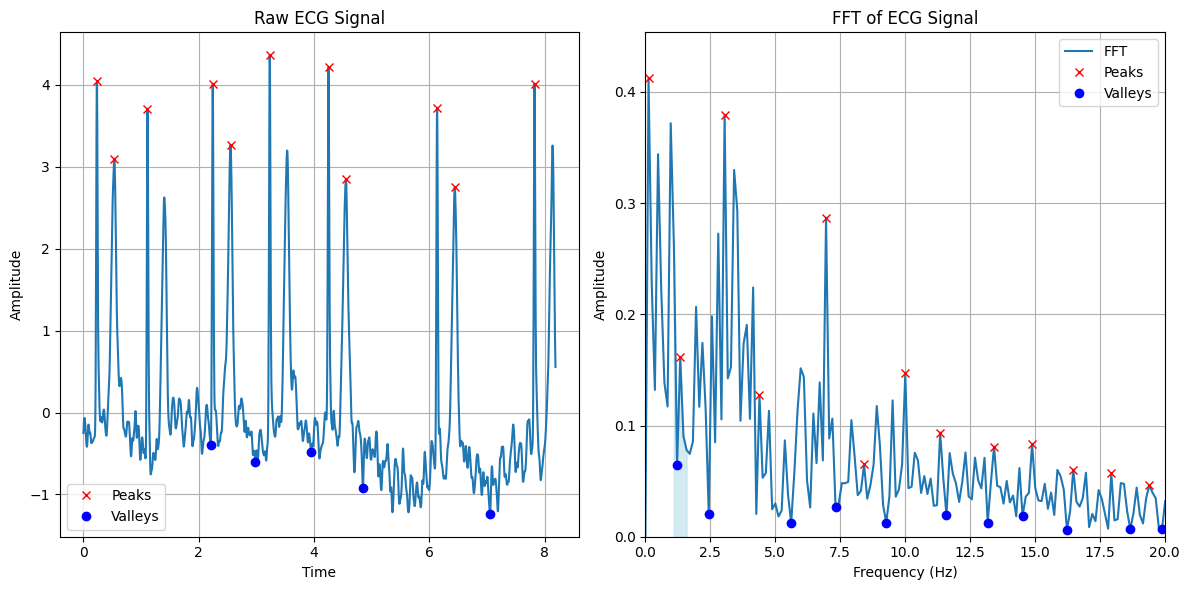

Afib


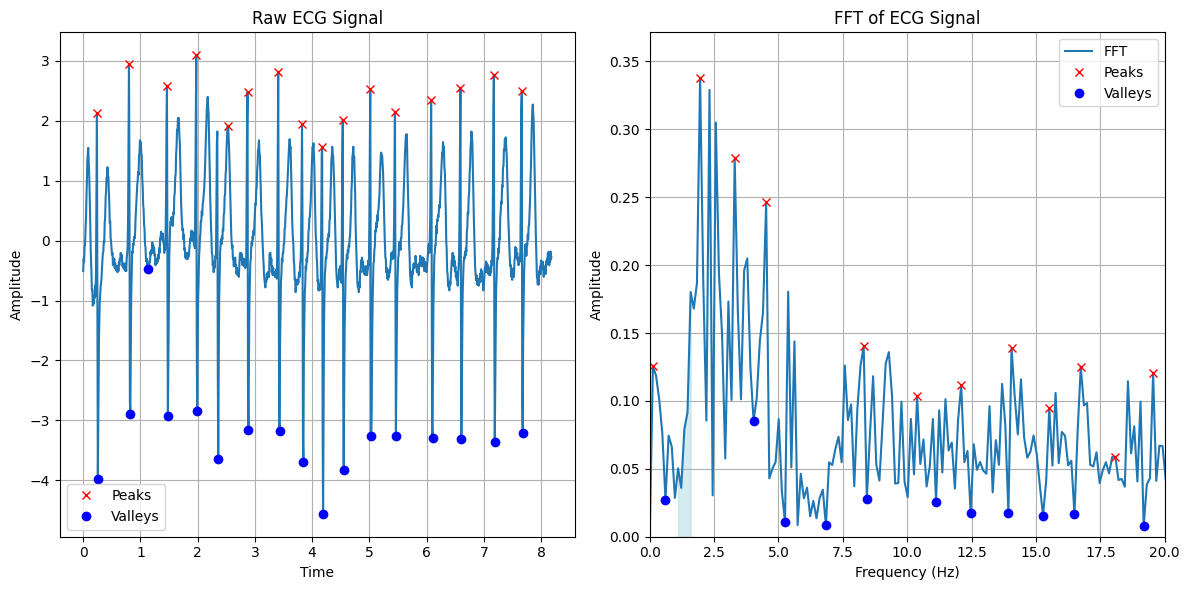

Healthy


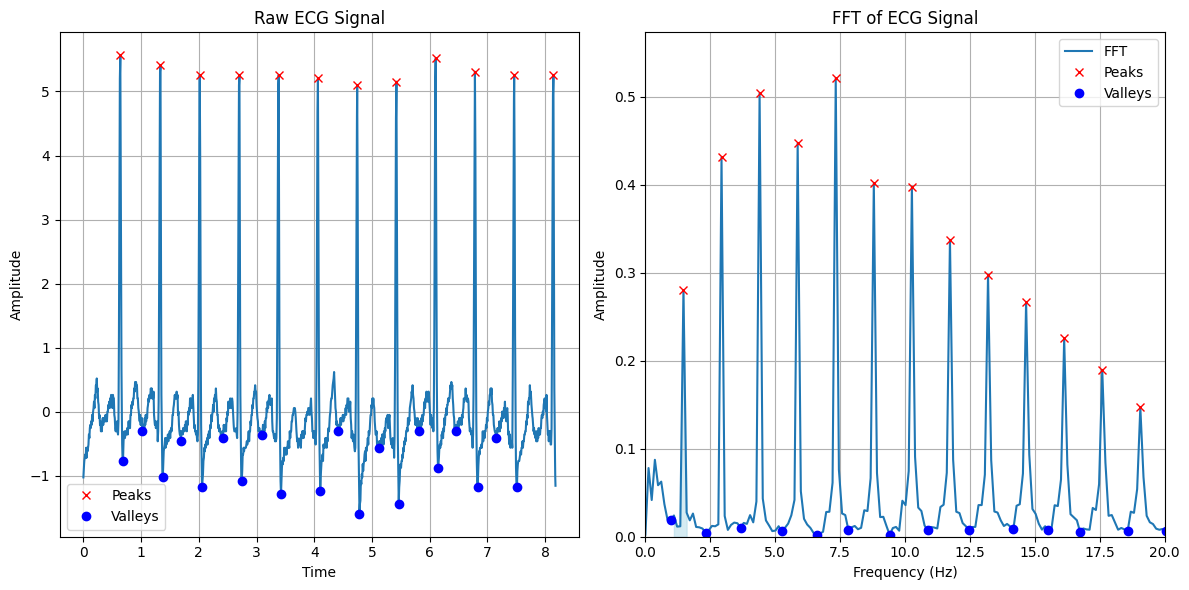

In [20]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

# List of signals
signals = [getWaveform("Ventricular_Flutter_Fib", 2, "ECG"),
           getWaveform("Ventricular_Flutter_Fib", 3, "ECG"),
           getWaveform("Ventricular_Tachycardia", 0, "ECG"),
           getWaveform("Ventricular_Tachycardia", 1, "ECG"),
           getWaveform("Tachycardia", 0, "ECG"),
           getWaveform("Bradycardia", 0, "ECG"),
           getWaveform("Atrial_Fibrillation", 0, "ECG"),
          getWaveform("Healthy", 0, "ECG")]
signal_labels = ["Ventricular_Flutter_Fib", "Ventricular_Flutter_Fib", "Ventricular_Tachycardia", "Ventricular_Tachycardia", "Tachy", "Brady", "Afib", "Healthy"]
#signals=getWaveforms("Tachycardia",1, "ECG")
for i, signal in enumerate(signals):
    print(signal_labels[i])
    # Time-domain parameters
    N = len(signal)
    t = np.arange(N) / fs  # Generates time values from 0 to (N-1)/fs

    # Frequency-domain parameters
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    yf_processed = 2.0 / N * np.abs(yf[:N // 2])

    # Detect peaks and valleys
    fft_peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=10,
                          prominence=0.0005,
                          width=2,
                          rel_height=1.5)
    
    fft_valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=10,
                          prominence=0.0005,
                          width=2,
                          rel_height=1)

    # Time domain features
    td_peaks, _ = find_peaks(signal,
                          height=1, 
                          threshold=0.005, 
                          distance=0.3*fs,
                          prominence=0.2,
                          width=None,
                          rel_height=None)
    
    td_valleys, _ = find_peaks(-signal,
                          height=None, 
                          threshold=0.01, 
                          distance=0.3*fs,
                          prominence=0.4,
                          width=None,
                          rel_height=None)

    # Plot raw signal and its FFT
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Left plot: Raw signal
    ax[0].plot(t, signal)
    ax[0].plot(t[td_peaks], signal[td_peaks], "x", label="Peaks", color='red')
    ax[0].plot(t[td_valleys], signal[td_valleys], "o", label="Valleys", color='blue')
    ax[0].set_title('Raw ECG Signal')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[0].grid()
    ax[0].legend()

    # Right plot: FFT
    ax[1].plot(xf, yf_processed, label='FFT')
    ax[1].plot(xf[fft_peaks], yf_processed[fft_peaks], "x", label="Peaks", color='red')
    ax[1].plot(xf[fft_valleys], yf_processed[fft_valleys], "o", label="Valleys", color='blue')
    ax[1].fill_between(xf, yf_processed, where=(xf >= 1) & (xf <= 1.67), color='lightblue', alpha=0.5)
    ax[1].set_xlim([0, 20])
    ax[1].set_ylim([0, max(yf_processed) * 1.1])  # Dynamic amplitude limit
    ax[1].set_title('FFT of ECG Signal')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].grid()
    ax[1].legend()

    plt.tight_layout()
    plt.show()


## Try different values for some parameters

1


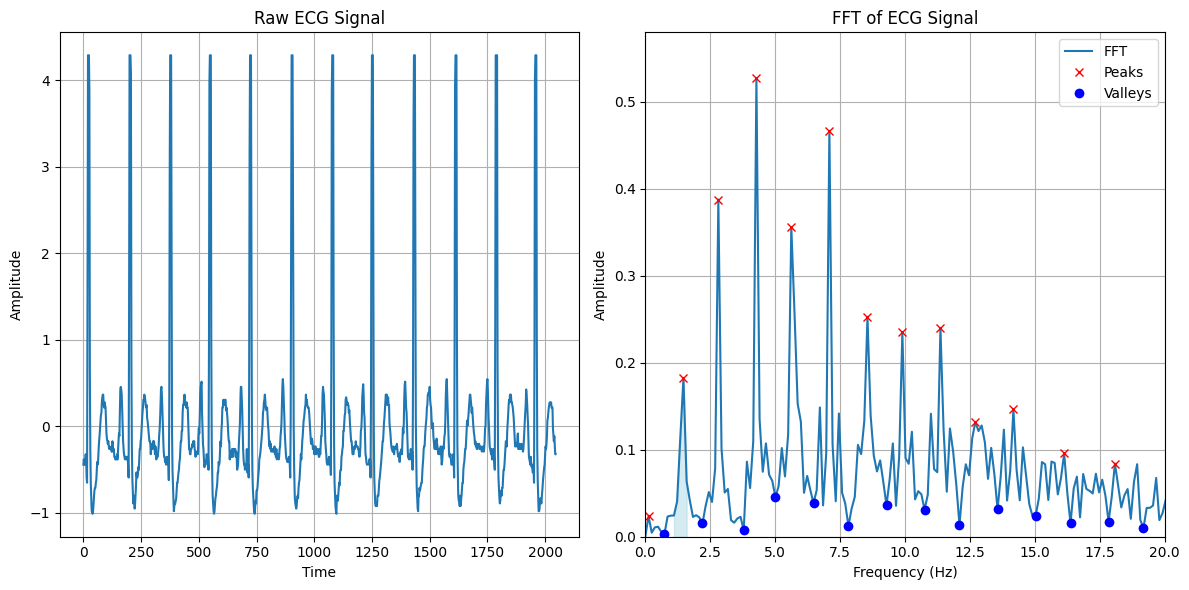

1.5


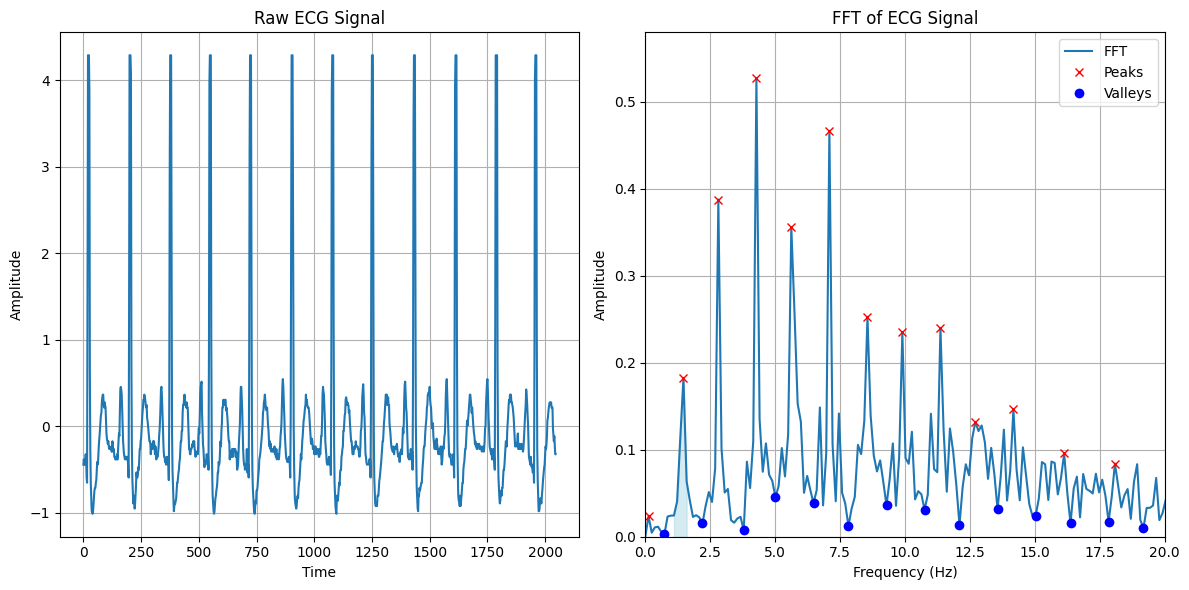

2


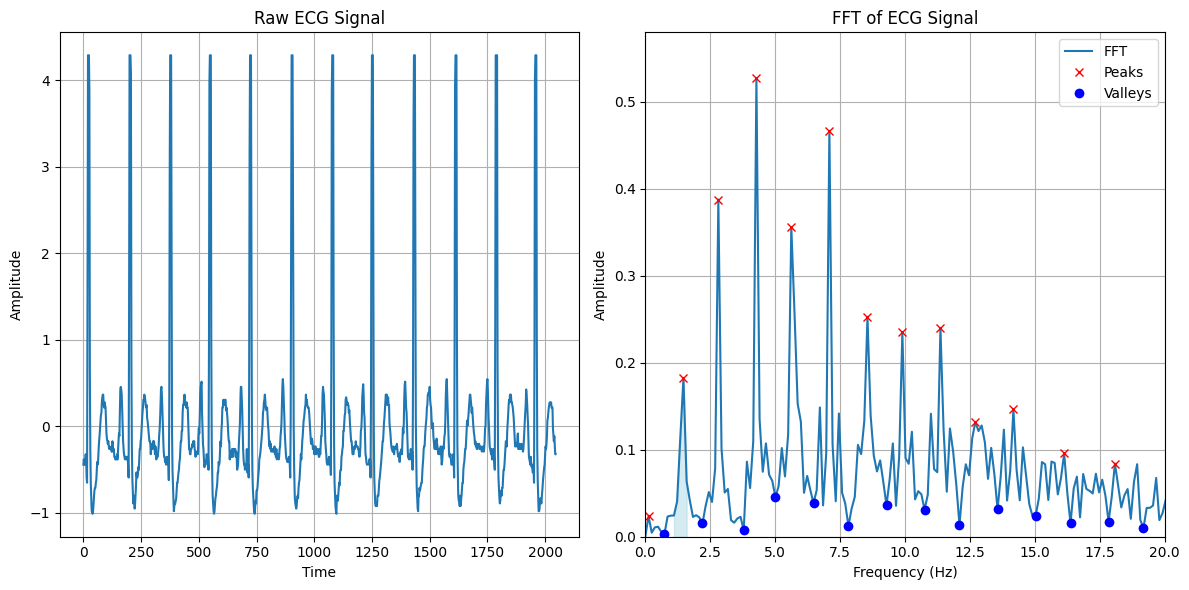

2.5


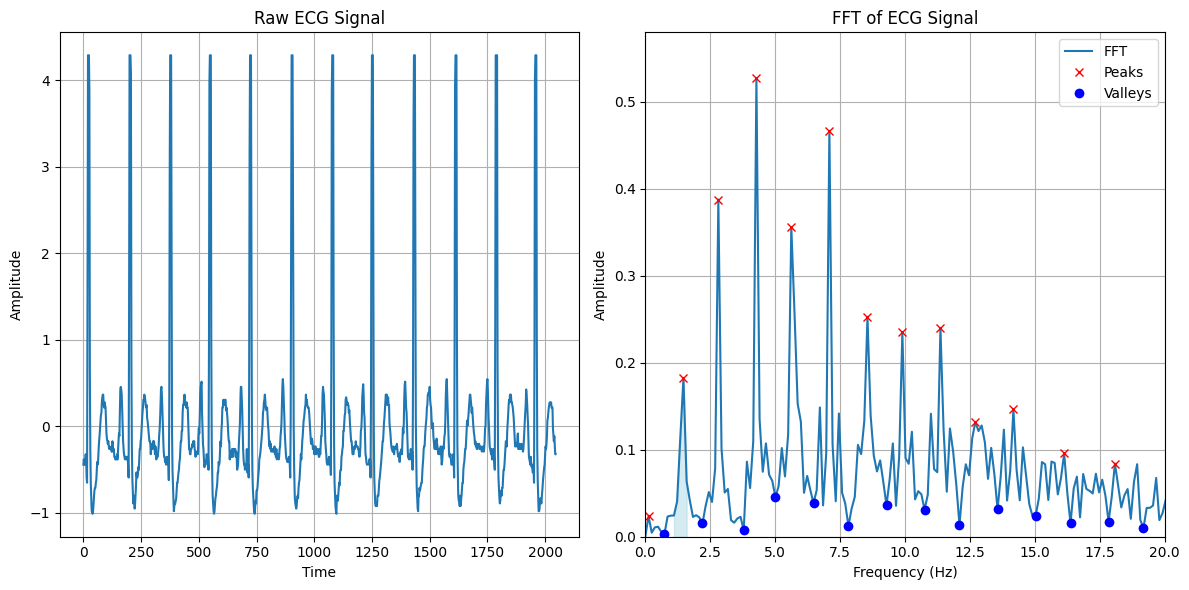

3


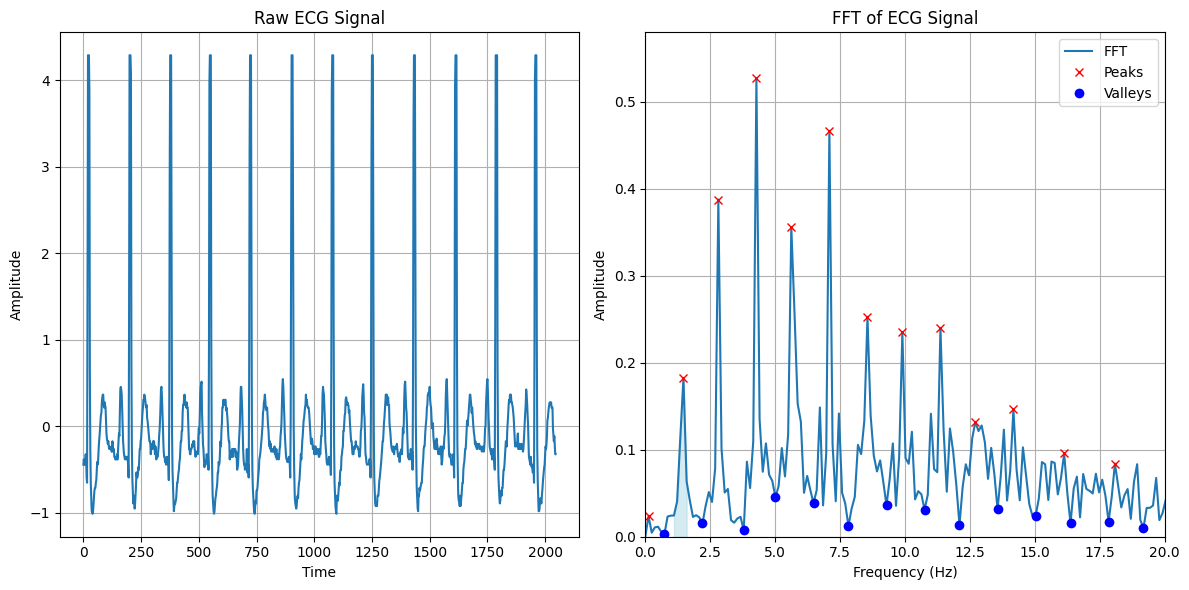

5


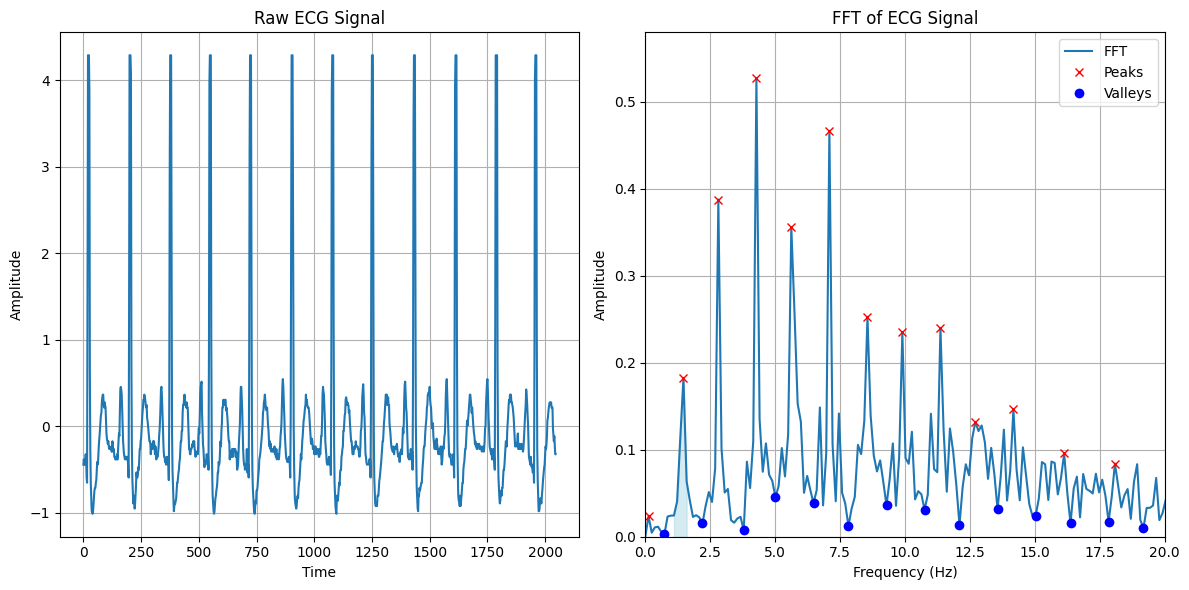

10


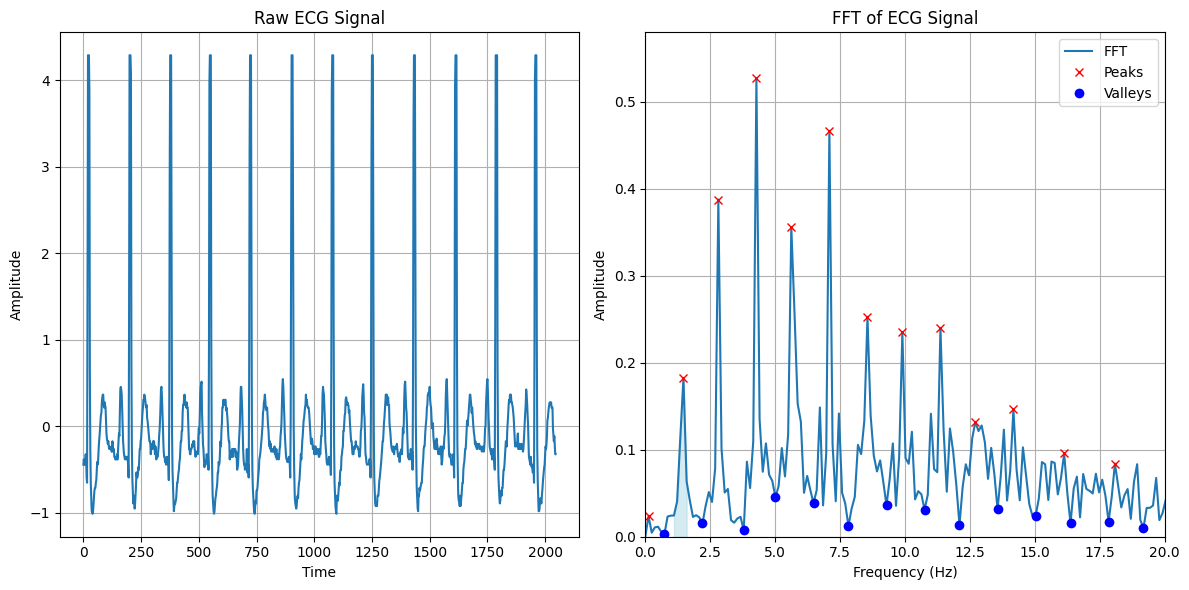

In [21]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

# List of signals
signal = getWaveform("Healthy", 6, "ECG")
vals=[1, 1.5, 2, 2.5, 3, 5, 10]

for val in vals:
    print(val)
    # Time-domain parameters
    N = len(signal)

    # Frequency-domain parameters
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    yf_processed = 2.0 / N * np.abs(yf[:N // 2])

    # Detect peaks and valleys
    peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=10,
                          prominence=0.0005,
                          width=2,
                          rel_height=1.5)
    
    valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=10,
                          prominence=0.0005,
                          width=2,
                          rel_height=1)

    # Plot raw signal and its FFT
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Left plot: Raw signal
    ax[0].plot(signal)
    ax[0].set_title('Raw ECG Signal')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[0].grid()

    # Right plot: FFT
    ax[1].plot(xf, yf_processed, label='FFT')
    ax[1].plot(xf[peaks], yf_processed[peaks], "x", label="Peaks", color='red')
    ax[1].plot(xf[valleys], yf_processed[valleys], "o", label="Valleys", color='blue')
    ax[1].fill_between(xf, yf_processed, where=(xf >= 1) & (xf <= 1.67), color='lightblue', alpha=0.5)
    ax[1].set_xlim([0, 20])
    ax[1].set_ylim([0, max(yf_processed) * 1.1])  # Dynamic amplitude limit
    ax[1].set_title('FFT of ECG Signal')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].grid()
    ax[1].legend()

    plt.tight_layout()
    plt.show()


In [22]:
def get_num_waves(label, trueAlarm=1):
    return len(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm)].index)

get_num_waves("Healthy")

16

## Collect features

In [23]:
def getIntervals(points):
    intervals=[]
    for pi in range(len(points)-1):
            intervals.append(points[pi+1]-points[pi])
    return intervals

In [24]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

labels=[]
labels_passed=[]
diff_median=[]
distance_median=[]
distance_std=[]
num_peaks=[]
num_valleys=[]
first_peak_freq=[]
second_peak_freq=[]
rr_median=[]
rr_std=[]
ss_median=[]
ss_std=[]

signals=[]

for label in df_filtered["Label"].unique():
    # Append true alarms
    for i in range(get_num_waves(label)):
        waveform_parts=getWaveforms(label, i, "ECG")
        signals.extend(waveform_parts)
        labels.extend(len(waveform_parts)*[label])
    # Append a false alarm
    for i in range(get_num_waves(label, 0)):
        waveform_parts=getWaveforms(label, 0, "ECG", trueAlarm=0)
        signals.extend(waveform_parts)
        labels.extend(len(waveform_parts)*["Healthy"])


for i, signal in enumerate(signals):
    # Time-domain parameters
    N = len(signal)

    # Frequency-domain parameters
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    yf_processed = 2.0 / N * np.abs(yf[:N // 2])

    # Detect peaks and valleys
    fft_peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.001,
                          width=1.5,
                          rel_height=0.5)
    
    fft_valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.001,
                          width=3,
                          rel_height=0.5)
    # Time domain features
    td_peaks, _ = find_peaks(signal,
                          height=1, 
                          threshold=0.005, 
                          distance=0.3*fs,
                          prominence=0.2,
                          width=None,
                          rel_height=None)
    
    td_valleys, _ = find_peaks(-signal,
                          height=None, 
                          threshold=0.01, 
                          distance=0.3*fs,
                          prominence=0.4,
                          width=None,
                          rel_height=None)
    if(not np.isnan(yf).any()):
        diff_median.append(np.median(2.0/N * np.abs(yf[:N//2])[fft_peaks])-np.median(2.0/N * np.abs(yf[:N//2])[fft_valleys]))
        num_peaks.append(len(fft_peaks))
        num_valleys.append(len(fft_valleys))
        fft_intervals=getIntervals(2.0/N * np.abs(yf[:N//2])[fft_peaks]) # find intervals between every two peaks
        distance_median.append(np.median(fft_intervals))
        distance_std.append(np.std(fft_intervals))
        try:
            first_peak_freq.append(xf[fft_peaks[0]])
        except:
            first_peak_freq.append(0)
        try:
            second_peak_freq.append(xf[fft_peaks[1]])
        except:
            second_peak_freq.append(0)
        
        labels_passed.append(labels[i])

        td_rr=getIntervals(td_peaks)
        td_ss=getIntervals(td_valleys)
        rr_median.append(np.median(td_rr))
        rr_std.append(np.std(td_rr))
        ss_median.append(np.median(td_ss))
        ss_std.append(np.std(td_ss))


samples_df=pd.DataFrame({"Labels": labels_passed, "diff_median":diff_median, "dist_median": distance_median, "dist_std": distance_std, "num_peaks":num_peaks, "num_valleys":num_valleys, "first_peak_freq":first_peak_freq, "second_peak_freq":second_peak_freq, "rr_median": rr_median, "rr_std": rr_std, "ss_median": ss_median, "ss_std": ss_std})
samples_df


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Labels  diff_median  dist_median   dist_std  \
0      Ventricular_Tachycardia     0.086064    -0.017452  51.336903   
1      Ventricular_Tachycardia     2.669632    -0.011962  47.925111   
2      Ventricular_Tachycardia    -0.845334    -0.002351  72.201973   
3      Ventricular_Tachycardia    -1.655097    -0.004715  44.144372   
4      Ventricular_Tachycardia    -2.129330    -0.006511  53.360014   
...                        ...          ...          ...        ...   
24230                  Healthy     0.003943    -0.000209   0.005608   
24231                  Healthy     0.003091    -0.000274   0.004317   
24232                  Healthy     0.003467    -0.000083   0.011411   
24233                  Healthy     0.001783    -0.000189   0.005234   
24234                  Healthy     0.002305    -0.000162   0.008717   

       num_peaks  num_valleys  first_peak_freq  second_peak_freq  rr_median  \
0             99           52         3.662109          5.004883       93.0   
1            112           71         0.854492          1.342773       87.0   
2            136           68         0.854492          1.220703       81.0   
3            121           57         0.732422          1.220703       98.0   
4            140           61         1.098633          1.586914       84.0   
...          ...          ...              ...               ...        ...   
24230         34           46         0.244141          1.586914      156.0   
24231         44           46         0.244141          0.732422      156.0   
24232         23           49         1.586914          3.173828      154.0   
24233         31           55         0.976562          3.295898      154.0   
24234         27           51         0.854492          6.347656      156.0   

          rr_std  ss_median      ss_std  
0      20.416844      101.0   22.883764  
1      18.741347      115.0   25.429217  
2      20.131315      118.5   24.069857  
3      18.022971      112.0   23.450307  
4      17.866981       91.5   24.996200  
...          ...        ...         ...  
24230  44.569567      156.0  113.413097  
24231   1.190238      156.0   54.129097  
24232   0.986013      154.0   65.040159  
24233   0.532939      154.0  107.405773  
24234   0.745356      156.0   49.579964  

[24235 rows x 12 columns]

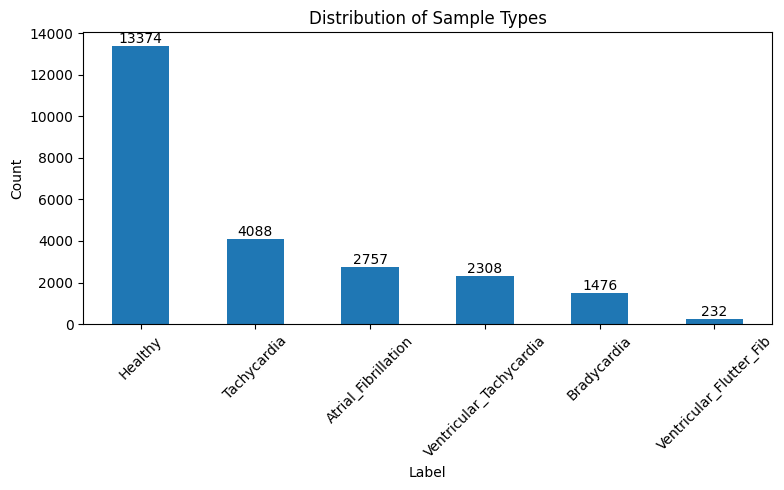

In [25]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = samples_df["Labels"].value_counts()

# Plot as a bar plot
label_counts.plot(kind="bar", figsize=(8, 5))
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Sample Types")
plt.xticks(rotation=45)
plt.bar_label(plt.gca().containers[0])  # Add count labels on bars
plt.tight_layout()
plt.show()


## Feature analysis

First, find the features most important for distinguishing healthy, tachy, and brady

In [26]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

labels=["Tachycardia", "Bradycardia"]
array = samples_df.fillna(0).loc[samples_df["Labels"].isin(labels)].copy()
X = array.iloc[:,1:]
y = array["Labels"]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
display(pd.DataFrame({"Features": model.feature_names_in_, "Importances": model.feature_importances_}).sort_values("Importances", ascending=False))


Features  Importances
8             rr_std     0.196710
7          rr_median     0.134888
10            ss_std     0.127641
9          ss_median     0.095893
4        num_valleys     0.082608
0        diff_median     0.068385
2           dist_std     0.068094
1        dist_median     0.061325
3          num_peaks     0.058923
6   second_peak_freq     0.053256
5    first_peak_freq     0.052277

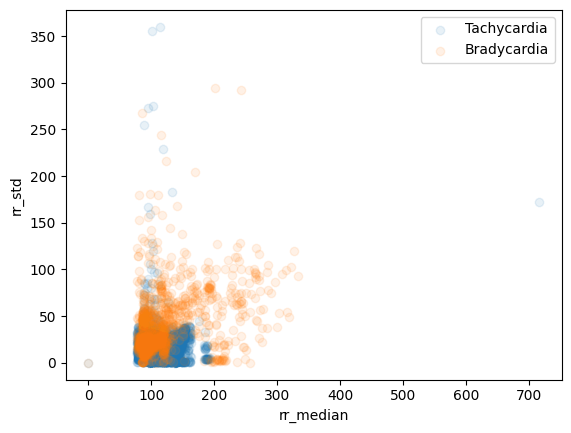

In [27]:
features= ["rr_median", "rr_std"]

for label in labels:
    plt.scatter(array.loc[array["Labels"]==label, features[0]], array.loc[array["Labels"]==label, features[1]], label=label, alpha=0.1)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

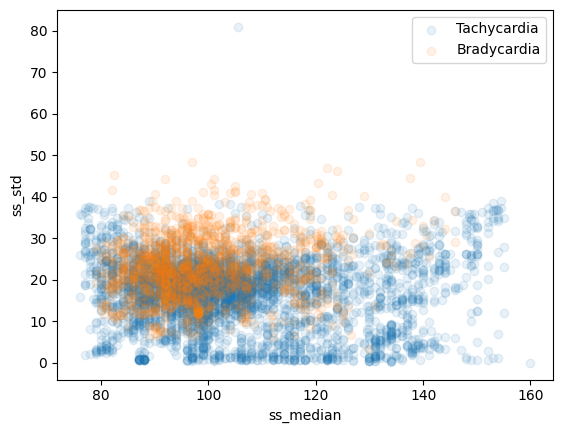

In [28]:
features= ["ss_median", "ss_std"]

for label in labels:
    plt.scatter(array.loc[array["Labels"]==label, features[0]], array.loc[array["Labels"]==label, features[1]], label=label, alpha=0.1)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

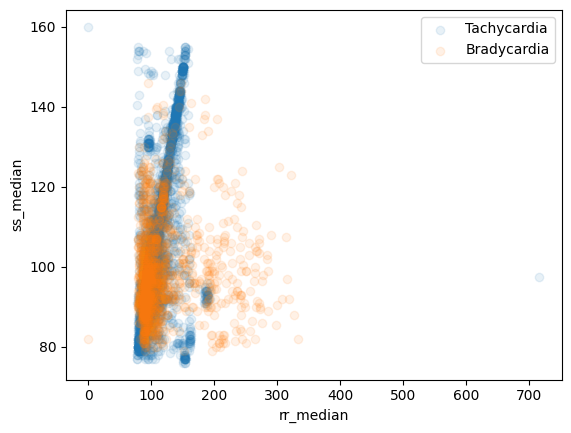

In [29]:
features= ["rr_median", "ss_median"]

for label in labels:
    plt.scatter(array.loc[array["Labels"]==label, features[0]], array.loc[array["Labels"]==label, features[1]], label=label, alpha=0.1)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

Next, find features most important for distinguishing the other arrhythmias

In [30]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

labels=["Healthy", "Ventricular_Flutter_Fib", "Ventricular_Tachycardia", "Atrial_Fibrillation"]
array = samples_df.fillna(0).loc[samples_df["Labels"].isin(labels)].copy()
X = array.iloc[:,1:]
y = array["Labels"]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
display(pd.DataFrame({"Features": model.feature_names_in_, "Importances": model.feature_importances_}).sort_values("Importances", ascending=False))


Features  Importances
4        num_valleys     0.173617
3          num_peaks     0.147387
9          ss_median     0.137028
2           dist_std     0.099612
0        diff_median     0.074477
7          rr_median     0.074452
10            ss_std     0.071857
8             rr_std     0.066767
6   second_peak_freq     0.062318
5    first_peak_freq     0.050753
1        dist_median     0.041730

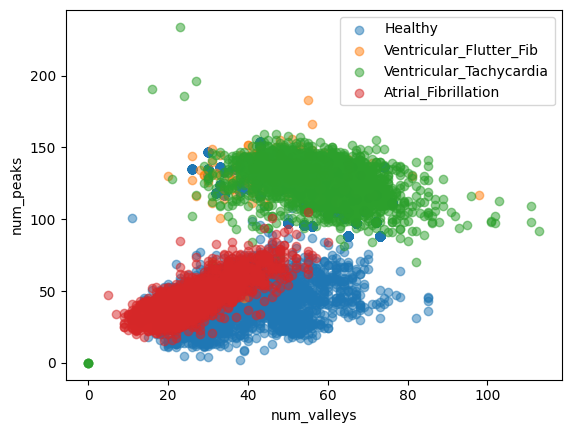

In [31]:
features= ["num_valleys", "num_peaks"]

for label in labels:
    plt.scatter(array.loc[array["Labels"]==label, features[0]], array.loc[array["Labels"]==label, features[1]], label=label, alpha=0.5)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

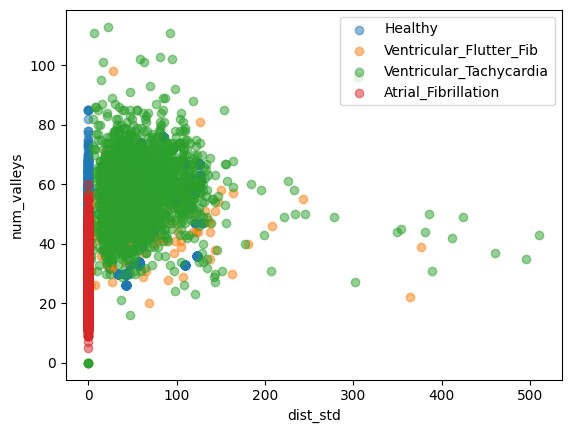

In [32]:
features= ["dist_std", "num_valleys"]

for label in labels:
    plt.scatter(array.loc[array["Labels"]==label, features[0]], array.loc[array["Labels"]==label, features[1]], label=label, alpha=0.5)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

## Plot UMAP

In [33]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00


In [34]:
import umap
from sklearn.preprocessing import StandardScaler

umap_df=samples_df.loc[samples_df["Labels"].isin(["Tachycardia", "Bradycardia", "Healthy", "Atrial_Fibrillation", "Ventricular_Flutter_Fib", "Ventricular_Tachycardia"])].copy()
umap_df=umap_df.fillna(0)
umap_df.reset_index(inplace=True, drop=True)
display(umap_df)
reducer = umap.UMAP(random_state=6)
scaled_data = StandardScaler().fit_transform(umap_df.drop(["Labels"], axis=1))
embedding = reducer.fit_transform(scaled_data)

Labels  diff_median  dist_median   dist_std  \
0      Ventricular_Tachycardia     0.086064    -0.017452  51.336903   
1      Ventricular_Tachycardia     2.669632    -0.011962  47.925111   
2      Ventricular_Tachycardia    -0.845334    -0.002351  72.201973   
3      Ventricular_Tachycardia    -1.655097    -0.004715  44.144372   
4      Ventricular_Tachycardia    -2.129330    -0.006511  53.360014   
...                        ...          ...          ...        ...   
24230                  Healthy     0.003943    -0.000209   0.005608   
24231                  Healthy     0.003091    -0.000274   0.004317   
24232                  Healthy     0.003467    -0.000083   0.011411   
24233                  Healthy     0.001783    -0.000189   0.005234   
24234                  Healthy     0.002305    -0.000162   0.008717   

       num_peaks  num_valleys  first_peak_freq  second_peak_freq  rr_median  \
0             99           52         3.662109          5.004883       93.0   
1            112           71         0.854492          1.342773       87.0   
2            136           68         0.854492          1.220703       81.0   
3            121           57         0.732422          1.220703       98.0   
4            140           61         1.098633          1.586914       84.0   
...          ...          ...              ...               ...        ...   
24230         34           46         0.244141          1.586914      156.0   
24231         44           46         0.244141          0.732422      156.0   
24232         23           49         1.586914          3.173828      154.0   
24233         31           55         0.976562          3.295898      154.0   
24234         27           51         0.854492          6.347656      156.0   

          rr_std  ss_median      ss_std  
0      20.416844      101.0   22.883764  
1      18.741347      115.0   25.429217  
2      20.131315      118.5   24.069857  
3      18.022971      112.0   23.450307  
4      17.866981       91.5   24.996200  
...          ...        ...         ...  
24230  44.569567      156.0  113.413097  
24231   1.190238      156.0   54.129097  
24232   0.986013      154.0   65.040159  
24233   0.532939      154.0  107.405773  
24234   0.745356      156.0   49.579964  

[24235 rows x 12 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


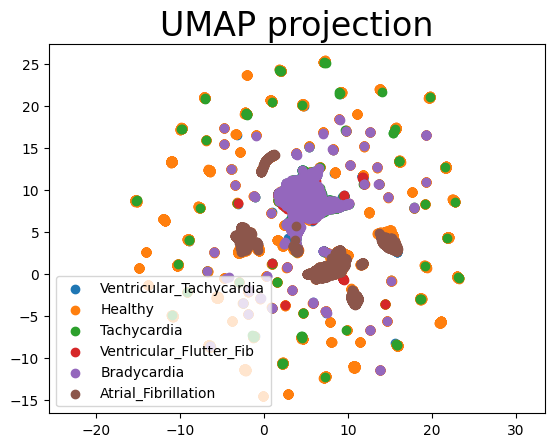

In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
c_encoded=label_encoder.fit_transform(umap_df["Labels"])

for label in umap_df["Labels"].unique():
    plt.scatter(
        embedding[umap_df.loc[umap_df["Labels"]==label].drop("Labels", axis=1).index, 0],
        embedding[umap_df.loc[umap_df["Labels"]==label].drop("Labels", axis=1).index, 1],
        label=label)
plt.legend()
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24);

## Tuning time-domain peak parameters

In [36]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sampling frequency
fs = 250

# Define separate parameter ranges for RR (peaks) and SS (valleys)
rr_threshold_values = [0.0005,0.001,0.005] # 0.005
rr_distance_values = [0.1 * fs, 0.2 * fs, 0.3 * fs] #75
rr_prominence_values = [0.2, 0.3, 0.5] # 0.2

ss_threshold_values = [0.01, 0.03, 0.06] # 0.01
ss_distance_values = [0.1 * fs, 0.2 * fs, 0.3 * fs] # 75
ss_prominence_values = [0.4, 0.5, 0.6] # 0.4

# Best results storage
best_rr_score = 0
best_ss_score = 0
best_rr_params = {}
best_ss_params = {}

### **RR Feature Grid Search**
for rr_threshold in rr_threshold_values:
    for rr_distance in rr_distance_values:
        for rr_prominence in rr_prominence_values:
            labels_passed = []
            rr_median, rr_std = [], []

            for i, signal in enumerate(signals):
                # Detect RR peaks
                td_peaks, _ = find_peaks(signal, threshold=rr_threshold, distance=rr_distance, prominence=rr_prominence)

                if len(td_peaks) > 1:
                    labels_passed.append(labels[i])
                    td_rr = np.diff(td_peaks) / fs  # Convert RR intervals to seconds

                    rr_median.append(np.median(td_rr))
                    rr_std.append(np.std(td_rr))

            if len(labels_passed) > 0:
                df = pd.DataFrame({"Labels": labels_passed, "rr_median": rr_median, "rr_std": rr_std})
                df["Labels"] = df["Labels"].map({"Bradycardia": 0, "Tachycardia": 1, "Healthy": 2})

                X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df["Labels"], test_size=0.3, random_state=42)
                clf = RandomForestClassifier(n_estimators=100, random_state=42)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)

                acc = accuracy_score(y_test, y_pred)
                print(f"RR - Threshold={rr_threshold}, Distance={rr_distance/fs}s, Prominence={rr_prominence} | Accuracy={acc:.3f}")

                if acc > best_rr_score:
                    best_rr_score = acc
                    best_rr_params = {"threshold": rr_threshold, "distance": rr_distance, "prominence": rr_prominence}

### **SS Feature Grid Search**
for ss_threshold in ss_threshold_values:
    for ss_distance in ss_distance_values:
        for ss_prominence in ss_prominence_values:
            labels_passed = []
            ss_median, ss_std = [], []

            for i, signal in enumerate(signals):
                # Detect SS valleys
                td_valleys, _ = find_peaks(-signal, threshold=ss_threshold, distance=ss_distance, prominence=ss_prominence)

                if len(td_valleys) > 1:
                    labels_passed.append(labels[i])
                    td_ss = np.diff(td_valleys) / fs  # Convert SS intervals to seconds

                    ss_median.append(np.median(td_ss))
                    ss_std.append(np.std(td_ss))

            if len(labels_passed) > 0:
                df = pd.DataFrame({"Labels": labels_passed, "ss_median": ss_median, "ss_std": ss_std})
                df["Labels"] = df["Labels"].map({"Bradycardia": 0, "Tachycardia": 1, "Healthy": 2})

                X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df["Labels"], test_size=0.3, random_state=42)
                clf = RandomForestClassifier(n_estimators=100, random_state=42)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)

                acc = accuracy_score(y_test, y_pred)
                print(f"SS - Threshold={ss_threshold}, Distance={ss_distance/fs}s, Prominence={ss_prominence} | Accuracy={acc:.3f}")

                if acc > best_ss_score:
                    best_ss_score = acc
                    best_ss_params = {"threshold": ss_threshold, "distance": ss_distance, "prominence": ss_prominence}

print("\nBest RR Parameters:", best_rr_params, "Best RR Accuracy:", best_rr_score)
print("Best SS Parameters:", best_ss_params, "Best SS Accuracy:", best_ss_score)


IndexError: list index out of range

## ML testing

In [37]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

labels=[]
labels_passed=[]
groups=[]
groups_passed=[]
diff_median=[]
distance_median=[]
distance_std=[]
num_peaks=[]
num_valleys=[]
first_peak_freq=[]
second_peak_freq=[]
rr_median=[]
rr_std=[]
ss_median=[]
ss_std=[]

signals=[]

for label in df_filtered["Label"].unique():
    # Append true alarms
    for i in range(get_num_waves(label)):
        waveform_parts=getWaveforms(label, i, "ECG")
        signals.extend(waveform_parts)
        labels.extend(len(waveform_parts)*[label])
        groups.extend(len(waveform_parts)*[label+str(i)])
    # Append a false alarm
    for i in range(get_num_waves(label, 0)):
        waveform_parts=getWaveforms(label, 0, "ECG", trueAlarm=0)
        signals.extend(waveform_parts)
        labels.extend(len(waveform_parts)*["Healthy"])
        groups.extend(len(waveform_parts)*["FalseAlarm"+str(i)])


for i, signal in enumerate(signals):
    # Time-domain parameters
    N = len(signal)

    # Frequency-domain parameters
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    yf_processed = 2.0 / N * np.abs(yf[:N // 2])

    # Detect peaks and valleys
    fft_peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.001,
                          width=1.5,
                          rel_height=0.5)
    
    fft_valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.001,
                          width=3,
                          rel_height=0.5)
    # Time domain features
    td_peaks, _ = find_peaks(signal,
                          height=1, 
                          threshold=0.005, 
                          distance=0.3*fs,
                          prominence=0.2,
                          width=None,
                          rel_height=None)
    
    td_valleys, _ = find_peaks(-signal,
                          height=None, 
                          threshold=0.01, 
                          distance=0.3*fs,
                          prominence=0.4,
                          width=None,
                          rel_height=None)
    if(not np.isnan(yf).any()):
        diff_median.append(np.median(2.0/N * np.abs(yf[:N//2])[fft_peaks])-np.median(2.0/N * np.abs(yf[:N//2])[fft_valleys]))
        num_peaks.append(len(fft_peaks))
        num_valleys.append(len(fft_valleys))
        fft_intervals=getIntervals(2.0/N * np.abs(yf[:N//2])[fft_peaks]) # find intervals between every two peaks
        distance_median.append(np.median(fft_intervals))
        distance_std.append(np.std(fft_intervals))
        try:
            first_peak_freq.append(xf[fft_peaks[0]])
        except:
            first_peak_freq.append(0)
        try:
            second_peak_freq.append(xf[fft_peaks[1]])
        except:
            second_peak_freq.append(0)
        
        labels_passed.append(labels[i])
        groups_passed.append(groups[i])

        td_rr=getIntervals(td_peaks)
        td_ss=getIntervals(td_valleys)
        rr_median.append(np.median(td_rr))
        rr_std.append(np.std(td_rr))
        ss_median.append(np.median(td_ss))
        ss_std.append(np.std(td_ss))


samples_df=pd.DataFrame({"Labels": labels_passed, "Groups": groups_passed, "diff_median":diff_median, "dist_median": distance_median, "dist_std": distance_std, "num_peaks":num_peaks, "num_valleys":num_valleys, "first_peak_freq":first_peak_freq, "second_peak_freq":second_peak_freq, "rr_median": rr_median, "rr_std": rr_std, "ss_median": ss_median, "ss_std": ss_std})
samples_df


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Labels                    Groups  diff_median  \
0      Ventricular_Tachycardia  Ventricular_Tachycardia0     0.086064   
1      Ventricular_Tachycardia  Ventricular_Tachycardia0     2.669632   
2      Ventricular_Tachycardia  Ventricular_Tachycardia0    -0.845334   
3      Ventricular_Tachycardia  Ventricular_Tachycardia0    -1.655097   
4      Ventricular_Tachycardia  Ventricular_Tachycardia0    -2.129330   
...                        ...                       ...          ...   
24230                  Healthy                 Healthy15     0.003943   
24231                  Healthy                 Healthy15     0.003091   
24232                  Healthy                 Healthy15     0.003467   
24233                  Healthy                 Healthy15     0.001783   
24234                  Healthy                 Healthy15     0.002305   

       dist_median   dist_std  num_peaks  num_valleys  first_peak_freq  \
0        -0.017452  51.336903         99           52         3.662109   
1        -0.011962  47.925111        112           71         0.854492   
2        -0.002351  72.201973        136           68         0.854492   
3        -0.004715  44.144372        121           57         0.732422   
4        -0.006511  53.360014        140           61         1.098633   
...            ...        ...        ...          ...              ...   
24230    -0.000209   0.005608         34           46         0.244141   
24231    -0.000274   0.004317         44           46         0.244141   
24232    -0.000083   0.011411         23           49         1.586914   
24233    -0.000189   0.005234         31           55         0.976562   
24234    -0.000162   0.008717         27           51         0.854492   

       second_peak_freq  rr_median     rr_std  ss_median      ss_std  
0              5.004883       93.0  20.416844      101.0   22.883764  
1              1.342773       87.0  18.741347      115.0   25.429217  
2              1.220703       81.0  20.131315      118.5   24.069857  
3              1.220703       98.0  18.022971      112.0   23.450307  
4              1.586914       84.0  17.866981       91.5   24.996200  
...                 ...        ...        ...        ...         ...  
24230          1.586914      156.0  44.569567      156.0  113.413097  
24231          0.732422      156.0   1.190238      156.0   54.129097  
24232          3.173828      154.0   0.986013      154.0   65.040159  
24233          3.295898      154.0   0.532939      154.0  107.405773  
24234          6.347656      156.0   0.745356      156.0   49.579964  

[24235 rows x 13 columns]

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import explained_variance_score,max_error,mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score, accuracy_score
import matplotlib.pyplot as plt
import pickle as pickle
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix

LogR_params = {
    "penalty": ['l1','l2', 'elasticnet'], # if it gives error, remove this param
    "fit_intercept": [True, False],
    "tol": [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 10],
    "solver":['saga']
}

DT_params = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [2, 3],
    "min_samples_leaf": [2, 4, 6],
    "max_features": ["sqrt", 7, 10]
}

RF_params = {
    "max_depth": [4, 5,10],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
    "max_features": ["sqrt", 7, 10],
    "n_estimators": [50]
}


def get_scoring_function(scoring):
    if scoring == 'explained_variance':
        return explained_variance_score
    elif scoring == 'max_error':
        return max_error
    elif scoring == 'neg_mean_absolute_error':
        return lambda y_true, y_pred: -mean_absolute_error(y_true, y_pred)
    elif scoring == 'neg_mean_squared_error':
        return lambda y_true, y_pred: -mean_squared_error(y_true, y_pred)
    elif scoring == 'neg_mean_squared_log_error':
        return lambda y_true, y_pred: -mean_squared_log_error(y_true, y_pred)
    elif scoring == 'r2':
        return r2_score
    elif scoring == 'accuracy':
        return accuracy_score
    else:
        raise ValueError(f"Scoring method '{scoring}' is not recognized. Available methods are: ['explained_variance', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'r2', 'accuracy_score']")


class MLModelTrainer:
    def __init__(self, model_name, n_iter=10, cv=5, scoring='accuracy'):
        self.model_name = model_name
        self.n_iter = n_iter
        self.cv = cv
        self.scoring = scoring
        
        # Initialize model based on the specified model_name
        self.model, self.param_distributions = self._initialize_model()
        
        
            

    def _initialize_model(self):
        models = {
            'LogR': LogisticRegression(),
            'decision_tree': DecisionTreeClassifier(),
            'random_forest': RandomForestClassifier()
        }
        
        params = {
            'LogR': LogR_params,
            'decision_tree': DT_params,
            'random_forest': RF_params
        }
        
        if self.model_name not in models:
            raise ValueError(f"Model '{self.model_name}' is not supported.")
        
        return models[self.model_name], params[self.model_name]
    
    def fit(self, X, y):
        # Create a pipeline with standard scaling and the specified model
        '''pipeline = Pipeline([
            ('scaler', StandardScaler()),  # Standardize features
            ('model', self.model)
        ])'''

        if self.param_distributions:
            # Perform RandomizedSearchCV for hyperparameter tuning
            random_search = RandomizedSearchCV(
                self.model, 
                param_distributions=self.param_distributions,
                n_iter=self.n_iter, 
                cv=self.cv, 
                scoring=self.scoring,
                random_state=42, 
                n_jobs=-1
            )
            random_search.fit(X, y)
            self.best_model = random_search.best_estimator_
            self.best_params = random_search.best_params_
        else:
            # Fit the pipeline without hyperparameter tuning
            self.best_model = self.model.fit(X, y)
            self.best_params = None

        
    def cross_validation(self, X, y, input_value=None):
        self.X = X.copy()
        self.y = y.copy()

        NUM_TRIALS = input_value if input_value else self.n_iter

        '''if 'Group' in X.columns:
            X.drop(columns=['Group'], inplace=True)

        # Create the group column for grouping
        X['Group'] = X.groupby(list(set(X.columns) - set(['Transcripts']))).ngroup()'''
            
        #self.X.drop("Gene", inplace=True, axis=1)
        self.G=self.X["Groups"]
        self.X.drop("Groups", inplace=True, axis=1)
        
        self.features = self.X.columns
        self.itr_number = []
        self.outer_results = []
        self.inner_results = []
        self.model_params = []
        self.G_test_list = []
        self.y_test_list = []
        self.pred_list = []

        for i in range(NUM_TRIALS):
            cv_outer = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=i)

            for train_index, test_index in cv_outer.split(self.X, self.y, self.G):
                X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
                y_train, y_test = self.y[train_index], self.y[test_index]
                G_train, G_test = self.G[train_index], self.G[test_index]

                model_to_use = self.best_model if hasattr(self, 'best_model') else self.model

                G_test = np.array(G_test)
                self.G_test_list.append(G_test)
                y_test = np.array(y_test)
                self.y_test_list.append(y_test)

                cv_inner = GroupKFold(n_splits=10)
                search = RandomizedSearchCV(
                    estimator=model_to_use,
                    param_distributions=self.param_distributions,
                    n_iter=30,
                    verbose=0,
                    scoring=self.scoring,
                    cv=cv_inner,
                    n_jobs=6,
                    refit=True
                )

                result = search.fit(X_train, y_train, groups=G_train)
                best_model = result.best_estimator_
                best_score = abs(result.best_score_)
                self.inner_results.append(best_score)

                yhat = best_model.predict(X_test)
                self.pred_list.append(yhat)

                scoring_func = get_scoring_function(self.scoring)
                acc = scoring_func(y_test, yhat)

                self.itr_number.append(i + 1)
                self.outer_results.append(acc)
                self.model_params.append(result.best_params_)

                print('\n################################################################\n\nSTATUS REPORT:')
                print(f'Iteration {i + 1} of {NUM_TRIALS} runs completed')
                print(f'Test_Score: {acc:.3f}, Best_Valid_Score: {best_score:.3f}\n\nBest_Model_Params:\n{result.best_params_}')
                print("\n################################################################\n ")

                '''plt.figure(figsize=(10, 6))
                plt.scatter(y_test, yhat, edgecolor='k', alpha=0.3, edgecolors='face')
                #plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
                plt.xlabel('True Values')
                plt.ylabel('Predictions')
                plt.title('Prediction vs True Values')
                #plt.colorbar(label="Number of transcripts")
                plt.grid(True)
                plt.show()'''

          
    def find_best_model(self):
        # assign the best model paramaters
        best_model_params = self.CV_dataset.iloc[0,3]
        # set params from the best model to a class object
        best_model = self.model.set_params(**best_model_params)
        self.best_model = best_model.fit(self.X, self.y)
        self.y_pred=self.best_model.predict(self.X)
    
    def results(self):   
        #create dataframe with results of nested CV
        list_of_tuples = list(zip(self.itr_number, self.inner_results, self.outer_results, self.model_params, self.y_test_list, self.pred_list))
        CV_dataset = pd.DataFrame(list_of_tuples, columns = ['Iter', 'Valid Score', 'Test Score', 'Model Parms', 'True', 'Predicted'])
        CV_dataset['Score_difference'] = abs(CV_dataset['Valid Score'] - CV_dataset['Test Score']) #Groupby dataframe model iterations that best fit the data (i.e., validitaion <= test)
        CV_dataset.sort_values(by=['Score_difference', 'Test Score'], ascending=[True, False], inplace=True) 
        CV_dataset = CV_dataset.reset_index(drop=True) # Reset index of dataframe
        # save the results as a class object
        self.CV_dataset = CV_dataset
    
    def get_importances(self):
        if(self.model_name=='decision_tree' or self.model_name=='random_forest'):
            imp=pd.DataFrame([self.features,self.best_model.feature_importances_])
            imp=imp.T
            imp.columns=["Feature", "Importance"]
        elif(self.model_name=='LogR'):
            imp=pd.DataFrame()
            print(self.best_model.coef_)
            for c_i, c in enumerate(self.best_model.classes_):
                imp[c]=self.best_model.coef_[c_i]
            imp.set_index(self.best_model.feature_names_in_, inplace=True)
        
        try:
            imp.sort_values(by="Importance", ascending=False, inplace=True)
        except:
            pass
        #return imp.loc[imp["Importance"]>0].copy()
        return imp
    
    def plot_confusion_matrix(self, normalize=True):
        if not hasattr(self, 'y_test_list') or not hasattr(self, 'pred_list'):
            raise ValueError("Model must be fitted before plotting.")

        # Flatten lists of arrays
        y_true = np.concatenate(self.y_test_list)
        y_pred = np.concatenate(self.pred_list)

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Normalize if needed
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

        # Get class names from the trained model
        class_names = self.best_model.classes_

        # Plot the heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)

        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix' + (' (Normalized)' if normalize else ''))
        plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



################################################################

STATUS REPORT:
Iteration 1 of 5 runs completed
Test_Score: 0.707, Best_Valid_Score: 0.756

Best_Model_Params:
{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 7, 'max_depth': 5}

################################################################
 

################################################################

STATUS REPORT:
Iteration 2 of 5 runs completed
Test_Score: 0.749, Best_Valid_Score: 0.742

Best_Model_Params:
{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 7, 'max_depth': 5}

################################################################
 

################################################################

STATUS REPORT:
Iteration 3 of 5 runs completed
Test_Score: 0.777, Best_Valid_Score: 0.740

Best_Model_Params:
{'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 10, 'max_depth': 5}

################################################################
 

##############

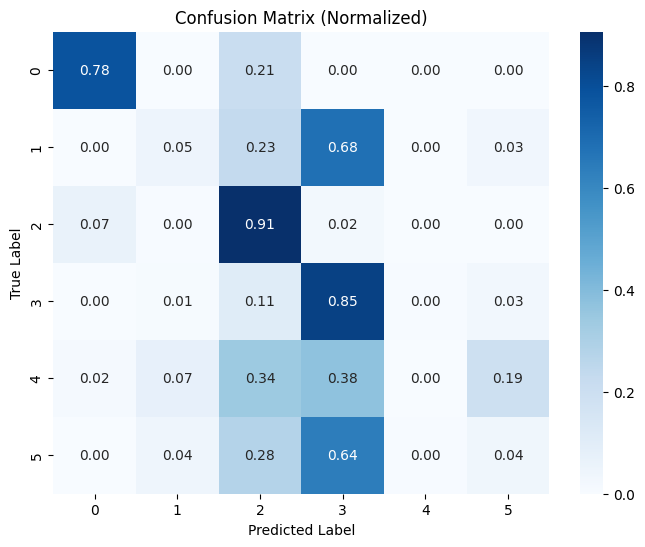

['Atrial_Fibrillation' 'Bradycardia' 'Healthy' 'Tachycardia'
 'Ventricular_Flutter_Fib' 'Ventricular_Tachycardia']


Feature Importance
9          ss_median   0.315493
2           dist_std   0.277754
8             rr_std   0.221658
0        diff_median   0.075979
4        num_valleys   0.056137
3          num_peaks   0.032128
5    first_peak_freq   0.010643
7          rr_median   0.005999
10            ss_std   0.004209
1        dist_median        0.0
6   second_peak_freq        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(i


################################################################

STATUS REPORT:
Iteration 1 of 5 runs completed
Test_Score: 0.634, Best_Valid_Score: 0.671

Best_Model_Params:
{'tol': 1e-06, 'solver': 'saga', 'penalty': 'l2', 'fit_intercept': True}

################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(ite


################################################################

STATUS REPORT:
Iteration 2 of 5 runs completed
Test_Score: 0.651, Best_Valid_Score: 0.663

Best_Model_Params:
{'tol': 1e-06, 'solver': 'saga', 'penalty': 'l2', 'fit_intercept': True}

################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(ite


################################################################

STATUS REPORT:
Iteration 3 of 5 runs completed
Test_Score: 0.714, Best_Valid_Score: 0.656

Best_Model_Params:
{'tol': 0.001, 'solver': 'saga', 'penalty': 'l2', 'fit_intercept': False}

################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(ite


################################################################

STATUS REPORT:
Iteration 4 of 5 runs completed
Test_Score: 0.700, Best_Valid_Score: 0.662

Best_Model_Params:
{'tol': 0.0001, 'solver': 'saga', 'penalty': 'l2', 'fit_intercept': True}

################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(i


################################################################

STATUS REPORT:
Iteration 5 of 5 runs completed
Test_Score: 0.675, Best_Valid_Score: 0.660

Best_Model_Params:
{'tol': 1e-06, 'solver': 'saga', 'penalty': 'l1', 'fit_intercept': True}

################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


   Iter  Valid Score  Test Score  \
0     2     0.662854    0.651410   
1     5     0.660268    0.674893   
2     1     0.671109    0.634002   
3     4     0.661567    0.699518   
4     3     0.655584    0.714006   

                                         Model Parms  \
0  {'tol': 1e-06, 'solver': 'saga', 'penalty': 'l...   
1  {'tol': 1e-06, 'solver': 'saga', 'penalty': 'l...   
2  {'tol': 1e-06, 'solver': 'saga', 'penalty': 'l...   
3  {'tol': 0.0001, 'solver': 'saga', 'penalty': '...   
4  {'tol': 0.001, 'solver': 'saga', 'penalty': 'l...   

                                                True  \
0  [Ventricular_Tachycardia, Ventricular_Tachycar...   
1  [Ventricular_Tachycardia, Ventricular_Tachycar...   
2  [Ventricular_Tachycardia, Ventricular_Tachycar...   
3  [Ventricular_Tachycardia, Ventricular_Tachycar...   
4  [Ventricular_Tachycardia, Ventricular_Tachycar...   

                                           Predicted  Score_difference  
0  [Healthy, Healthy, Healthy, Healt

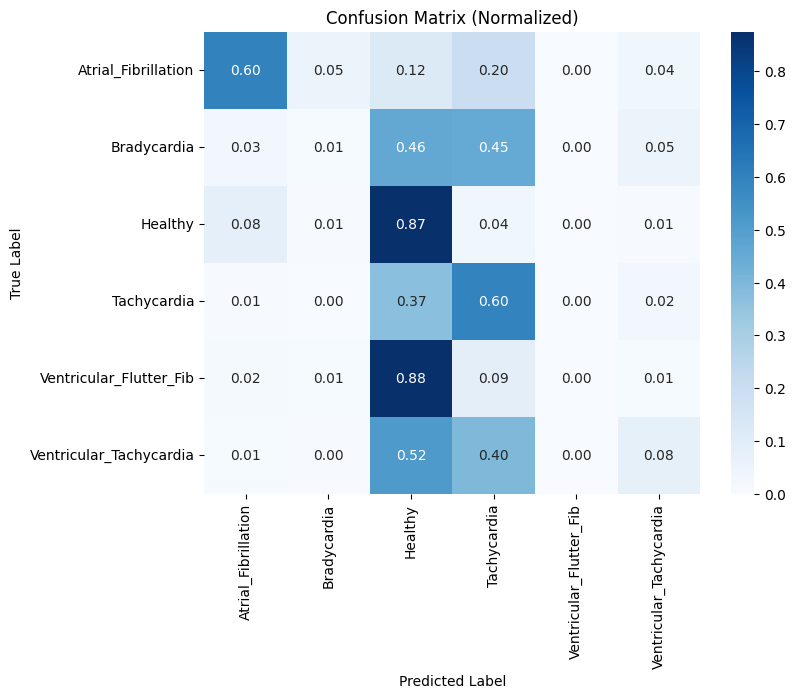

['Atrial_Fibrillation' 'Bradycardia' 'Healthy' 'Tachycardia'
 'Ventricular_Flutter_Fib' 'Ventricular_Tachycardia']
[[-1.73591781e-03  8.18047551e-05 -2.34461849e-01  2.03760467e-02
  -4.82698287e-02  6.20608510e-03  4.82221448e-03  4.46617876e-03
   9.00095032e-03  2.44403633e-02 -5.89659717e-03]
 [ 2.45218157e-03  6.28327919e-05  4.63559193e-02 -3.72041458e-03
   2.86982219e-02 -1.60009005e-02 -2.33704596e-02 -1.52454609e-03
   1.38333874e-02 -1.98155831e-02  1.11250403e-02]
 [-4.34426383e-02  7.14840948e-04  5.23625001e-02 -2.96929832e-02
   1.17870851e-02  4.49215510e-02  9.71632825e-02  4.30960402e-03
   1.01825605e-02  2.43954599e-02 -7.19458969e-03]
 [ 3.13072250e-02 -2.98997797e-05  3.78198856e-02  2.09121332e-02
   1.47500173e-02 -1.79278432e-02 -5.02905250e-02 -6.15668954e-04
  -5.01194991e-02 -1.22082402e-02 -7.21625487e-03]
 [ 1.81692150e-02 -7.32528319e-04  4.64440131e-02 -1.02505741e-03
  -4.67221554e-02 -8.68662371e-03 -1.57374258e-02 -6.79305133e-03
   1.42530430e-02  1.

Atrial_Fibrillation  Bradycardia   Healthy  Tachycardia  \
diff_median                 -0.001736     0.002452 -0.043443     0.031307   
dist_median                  0.000082     0.000063  0.000715    -0.000030   
dist_std                    -0.234462     0.046356  0.052363     0.037820   
num_peaks                    0.020376    -0.003720 -0.029693     0.020912   
num_valleys                 -0.048270     0.028698  0.011787     0.014750   
first_peak_freq              0.006206    -0.016001  0.044922    -0.017928   
second_peak_freq             0.004822    -0.023370  0.097163    -0.050291   
rr_median                    0.004466    -0.001525  0.004310    -0.000616   
rr_std                       0.009001     0.013833  0.010183    -0.050119   
ss_median                    0.024440    -0.019816  0.024395    -0.012208   
ss_std                      -0.005897     0.011125 -0.007195    -0.007216   

                  Ventricular_Flutter_Fib  Ventricular_Tachycardia  
diff_median                      0.018169                -0.006750  
dist_median                     -0.000733                -0.000097  
dist_std                         0.046444                 0.051480  
num_peaks                       -0.001025                -0.006850  
num_valleys                     -0.046722                 0.039757  
first_peak_freq                 -0.008687                -0.008512  
second_peak_freq                -0.015737                -0.012587  
rr_median                       -0.006793                 0.000157  
rr_std                           0.014253                 0.002850  
ss_median                        0.001993                -0.018805  
ss_std                           0.000151                 0.009031


################################################################

STATUS REPORT:
Iteration 1 of 5 runs completed
Test_Score: 0.727, Best_Valid_Score: 0.807

Best_Model_Params:
{'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10}

################################################################
 

################################################################

STATUS REPORT:
Iteration 2 of 5 runs completed
Test_Score: 0.812, Best_Valid_Score: 0.791

Best_Model_Params:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

################################################################
 

################################################################

STATUS REPORT:
Iteration 3 of 5 runs completed
Test_Score: 0.826, Best_Valid_Score: 0.779

Best_Model_Params:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}

#####

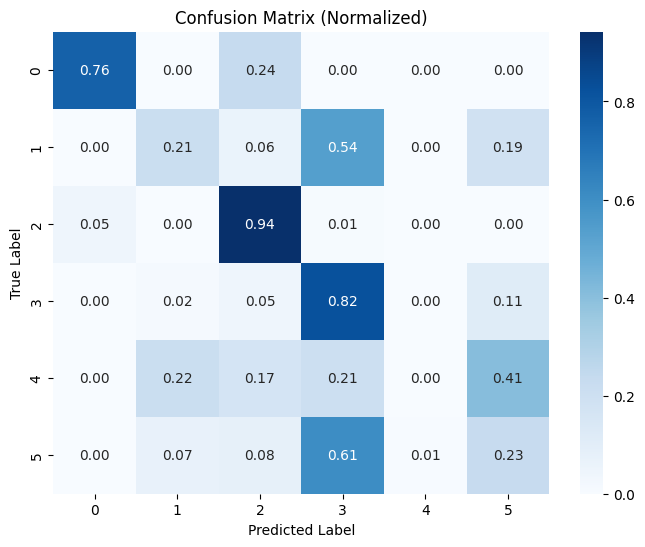

['Atrial_Fibrillation' 'Bradycardia' 'Healthy' 'Tachycardia'
 'Ventricular_Flutter_Fib' 'Ventricular_Tachycardia']


Feature Importance
9          ss_median   0.175116
8             rr_std   0.155374
4        num_valleys   0.130075
0        diff_median   0.106636
7          rr_median   0.106431
2           dist_std    0.09639
3          num_peaks   0.079206
10            ss_std   0.057903
1        dist_median   0.044719
6   second_peak_freq   0.032763
5    first_peak_freq   0.015386

Model  Iter  Valid Score  Test Score  \
0  decision_tree     2     0.742151    0.748926   
1  decision_tree     5     0.751791    0.760759   
0           LogR     2     0.662854    0.651410   
1           LogR     5     0.660268    0.674893   
0  random_forest     2     0.791312    0.811508   
1  random_forest     5     0.804054    0.782174   
2  random_forest     4     0.789420    0.821137   
2           LogR     1     0.671109    0.634002   
2  decision_tree     3     0.739703    0.777391   
3           LogR     4     0.661567    0.699518   
3  decision_tree     4     0.732553    0.774166   
3  random_forest     3     0.778976    0.826399   
4  decision_tree     1     0.756255    0.706628   
4           LogR     3     0.655584    0.714006   
4  random_forest     1     0.806638    0.727496   

                                         Model Parms  \
0  {'min_samples_split': 2, 'min_samples_leaf': 4...   
1  {'min_samples_split': 3, 'min_samples_leaf': 4...   
0  {'tol': 1e-06, 'solver': 'saga', 'penalty': 'l...   
1  {'tol': 1e-06, 'solver': 'saga', 'penalty': 'l...   
0  {'n_estimators': 50, 'min_samples_split': 2, '...   
1  {'n_estimators': 50, 'min_samples_split': 3, '...   
2  {'n_estimators': 50, 'min_samples_split': 3, '...   
2  {'tol': 1e-06, 'solver': 'saga', 'penalty': 'l...   
2  {'min_samples_split': 3, 'min_samples_leaf': 4...   
3  {'tol': 0.0001, 'solver': 'saga', 'penalty': '...   
3  {'min_samples_split': 2, 'min_samples_leaf': 2...   
3  {'n_estimators': 50, 'min_samples_split': 2, '...   
4  {'min_samples_split': 2, 'min_samples_leaf': 4...   
4  {'tol': 0.001, 'solver': 'saga', 'penalty': 'l...   
4  {'n_estimators': 50, 'min_samples_split': 3, '...   

                                                True  \
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
0  [Ventricular_Tachycardia, Ventricular_Tachycar...   
1  [Ventricular_Tachycardia, Ventricular_Tachycar...   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
2  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
2  [Ventricular_Tachycardia, Ventricular_Tachycar...   
2  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
3  [Ventricular_Tachycardia, Ventricular_Tachycar...   
3  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
3  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
4  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
4  [Ventricular_Tachycardia, Ventricular_Tachycar...   
4  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   

                                           Predicted  Score_difference  
0  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...          0.006775  
1  [1, 3, 3, 1, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 3, ...          0.008967  
0  [Healthy, Healthy, Healthy, Healthy, Tachycard...          0.011443  
1  [Healthy, Tachycardia, Tachycardia, Healthy, T...          0.014625  
0  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...          0.020196  
1  [5, 3, 3, 1, 3, 1, 5, 3, 5, 1, 1, 3, 1, 5, 3, ...          0.021880  
2  [3, 3, 2, 2, 3, 3, 2, 5, 3, 3, 5, 3, 3, 3, 3, ...          0.031716  
2  [Healthy, Ventricular_Tachycardia, Healthy, Ve...          0.037107  
2  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...          0.037688  
3  [Healthy, Healthy, Tachycardia, Tachycardia, H...          0.037950  
3  [0, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, ...          0.041614  
3  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...          0.047423  
4  [3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, ...          0.049627  
4  [Healthy, Healthy, Healthy, Healthy, Tachycard...          0.058422  
4  [3, 3, 5, 5, 5, 3, 5, 1, 1, 1, 3, 3, 3, 3, 5, ...          0.079142

In [46]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

model_names=['decision_tree','LogR','random_forest']

X=samples_df.drop("Labels", axis=1)
X=X.fillna(0)
y_raw=samples_df["Labels"]

hot_encoder = OneHotEncoder(sparse_output=False)
hot_encoded_labels = hot_encoder.fit_transform(np.array(y_raw).reshape(-1, 1))

label_encoder = LabelEncoder()
label_encoded_labels = label_encoder.fit_transform(np.array(y_raw).reshape(-1, 1))

best_models=[]
CV_datasets=[]
for model_name in model_names:
    if(model_name=="LogR"):
        y=y_raw
    else:
        y=label_encoded_labels
    trainer = MLModelTrainer(model_name=model_name, n_iter=5, cv=5)
    trainer.cross_validation(X,y)
    trainer.results()
    trainer.find_best_model()
    print(trainer.CV_dataset)
    print(trainer.best_model)
    best_models.append(trainer.best_model)
    trainer.plot_confusion_matrix()
    try:
        print(label_encoder.inverse_transform([0, 1, 2, 3, 4, 5]))
    except:
        pass
    importances=trainer.get_importances()
    display(importances)
    importances.to_excel(model_name+'_importances.xlsx')
    CV_datasets.append(trainer.CV_dataset)
    trainer.CV_dataset.to_pickle(model_name+".pkl", compression='infer', protocol=5, storage_options=None) # save dataframe as pickle file
    with open(model_name+'_model.pkl', 'wb') as file: # Save the Model to pickle file
              pickle.dump(trainer.best_model, file)
combined_datasets=pd.concat(CV_datasets, axis=0)
model_col=[]
for j, m in enumerate(model_names):
    for i in range(5):
        model_col.append(m)
combined_datasets.insert(0,"Model",model_col)
combined_datasets.sort_values(by=['Score_difference', 'Test Score'], ascending=[True, False], inplace=True)
display(combined_datasets)
combined_datasets.to_excel("results.xlsx")

Only heart rates

### Non heart rate related features

In [64]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

model_names=['decision_tree','LogR','random_forest']

X=samples_df.drop("Labels", axis=1).drop(samples_df.loc[samples_df["Labels"].isin(["Tachycardia", "Bradycardia", "Healthy"])].index, axis=0)
X=X.fillna(0)
y_raw=samples_df["Labels"].drop(samples_df.loc[samples_df["Labels"].isin(["Tachycardia", "Bradycardia"])].index, axis=0)
X.reset_index(inplace=True, drop=True)
y_raw.reset_index(inplace=True, drop=True)

hot_encoder = OneHotEncoder(sparse_output=False)
hot_encoded_labels = hot_encoder.fit_transform(np.array(y_raw).reshape(-1, 1))

label_encoder = LabelEncoder()
label_encoded_labels = label_encoder.fit_transform(np.array(y_raw).reshape(-1, 1))

best_models=[]
CV_datasets=[]
for model_name in model_names:
    if(model_name=="LogR"):
        y=y_raw
    else:
        y=label_encoded_labels
    trainer = MLModelTrainer(model_name=model_name, n_iter=5, cv=5)
    trainer.cross_validation(X,y)
    trainer.results()
    trainer.find_best_model()
    print(trainer.CV_dataset)
    print(trainer.best_model)
    best_models.append(trainer.best_model)
    trainer.plot_confusion_matrix()
    try:
        print(label_encoder.inverse_transform([0, 1, 2, 3, 4, 5]))
    except:
        pass
    importances=trainer.get_importances()
    display(importances)
    importances.to_excel(model_name+'_importances.xlsx')
    CV_datasets.append(trainer.CV_dataset)
    trainer.CV_dataset.to_pickle(model_name+".pkl", compression='infer', protocol=5, storage_options=None) # save dataframe as pickle file
    with open(model_name+'_model.pkl', 'wb') as file: # Save the Model to pickle file
              pickle.dump(trainer.best_model, file)
combined_datasets=pd.concat(CV_datasets, axis=0)
model_col=[]
for j, m in enumerate(model_names):
    for i in range(5):
        model_col.append(m)
combined_datasets.insert(0,"Model",model_col)
combined_datasets.sort_values(by=['Score_difference', 'Test Score'], ascending=[True, False], inplace=True)
display(combined_datasets)
combined_datasets.to_excel("results.xlsx")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [5297, 18671, 5297]

### Heart rate related features

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



################################################################

STATUS REPORT:
Iteration 1 of 5 runs completed
Test_Score: 0.864, Best_Valid_Score: 0.898

Best_Model_Params:
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 10, 'max_depth': 5}

################################################################
 

################################################################

STATUS REPORT:
Iteration 2 of 5 runs completed
Test_Score: 0.892, Best_Valid_Score: 0.886

Best_Model_Params:
{'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 7, 'max_depth': 5}

################################################################
 

################################################################

STATUS REPORT:
Iteration 3 of 5 runs completed
Test_Score: 0.895, Best_Valid_Score: 0.890

Best_Model_Params:
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 7, 'max_depth': 5}

################################################################
 

##############

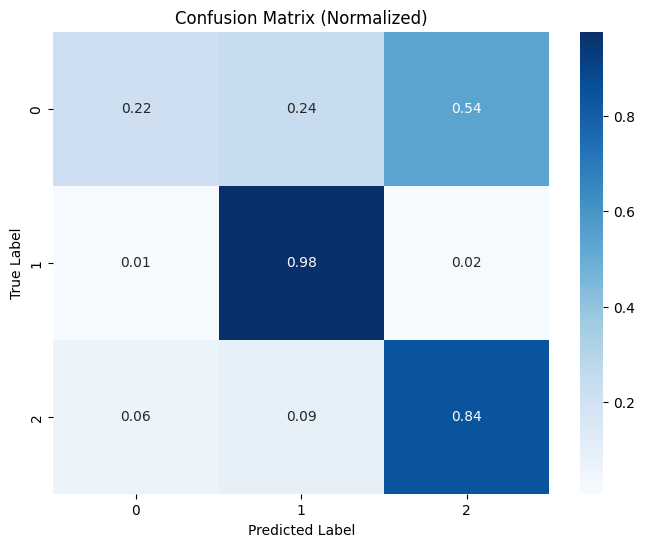

Feature Importance
9          ss_median   0.414103
8             rr_std   0.253111
0        diff_median   0.143178
2           dist_std   0.100755
3          num_peaks   0.043466
4        num_valleys   0.034624
7          rr_median   0.009917
10            ss_std   0.000847
1        dist_median        0.0
5    first_peak_freq        0.0
6   second_peak_freq        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(ite


################################################################

STATUS REPORT:
Iteration 1 of 5 runs completed
Test_Score: 0.775, Best_Valid_Score: 0.799

Best_Model_Params:
{'tol': 1e-05, 'solver': 'saga', 'penalty': 'l2', 'fit_intercept': False}

################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(ite


################################################################

STATUS REPORT:
Iteration 2 of 5 runs completed
Test_Score: 0.842, Best_Valid_Score: 0.783

Best_Model_Params:
{'tol': 0.001, 'solver': 'saga', 'penalty': 'l1', 'fit_intercept': False}

################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(i


################################################################

STATUS REPORT:
Iteration 3 of 5 runs completed
Test_Score: 0.809, Best_Valid_Score: 0.800

Best_Model_Params:
{'tol': 0.01, 'solver': 'saga', 'penalty': 'l1', 'fit_intercept': False}

################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(i


################################################################

STATUS REPORT:
Iteration 4 of 5 runs completed
Test_Score: 0.806, Best_Valid_Score: 0.789

Best_Model_Params:
{'tol': 1e-05, 'solver': 'saga', 'penalty': 'l2', 'fit_intercept': False}

################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(ite


################################################################

STATUS REPORT:
Iteration 5 of 5 runs completed
Test_Score: 0.822, Best_Valid_Score: 0.789

Best_Model_Params:
{'tol': 0.0001, 'solver': 'saga', 'penalty': 'l2', 'fit_intercept': False}

################################################################
 
   Iter  Valid Score  Test Score  \
0     3     0.800063    0.809126   
1     4     0.789039    0.806374   
2     1     0.799442    0.774732   
3     5     0.788635    0.822150   
4     2     0.782537    0.842093   

                                         Model Parms  \
0  {'tol': 0.01, 'solver': 'saga', 'penalty': 'l1...   
1  {'tol': 1e-05, 'solver': 'saga', 'penalty': 'l...   
2  {'tol': 1e-05, 'solver': 'saga', 'penalty': 'l...   
3  {'tol': 0.0001, 'solver': 'saga', 'penalty': '...   
4  {'tol': 0.001, 'solver': 'saga', 'penalty': 'l...   

                                                True  \
0  [Healthy, Healthy, Healthy, Healthy, Healthy, ...   
1  [Healthy, H

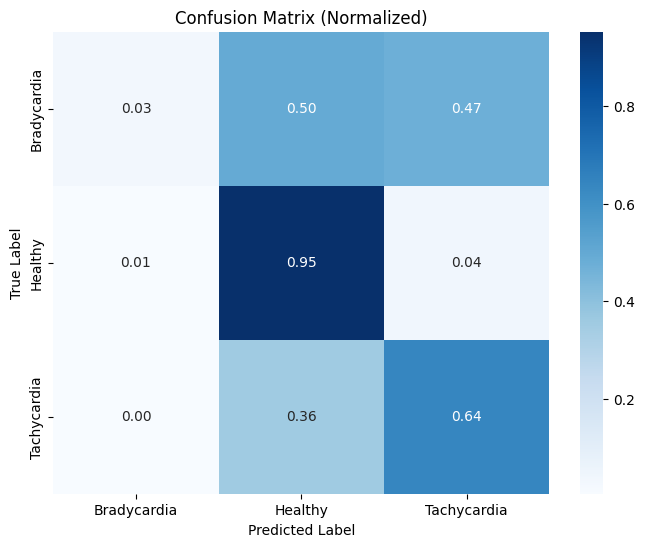

[[ 3.73933909e-03 -1.70666227e-05  2.43503449e-03  1.50094580e-03
   1.48429034e-02 -1.21396499e-02 -1.67304977e-02 -3.95890727e-04
   2.02948719e-02 -2.40712333e-02  1.62481368e-02]
 [-3.43402180e-02  1.49571189e-04  5.54234247e-03 -2.73207963e-02
  -1.45085325e-02  2.74263981e-02  5.58235553e-02  1.09753756e-03
   2.19292835e-02  3.65840337e-02 -8.37487697e-03]
 [ 3.05636016e-02 -9.53857268e-05 -8.01064650e-03  2.57826350e-02
  -3.09002715e-04 -1.52494551e-02 -3.90557645e-02 -6.65817855e-04
  -4.22610923e-02 -1.24755074e-02 -7.83620898e-03]]


Bradycardia   Healthy  Tachycardia
diff_median          0.003739 -0.034340     0.030564
dist_median         -0.000017  0.000150    -0.000095
dist_std             0.002435  0.005542    -0.008011
num_peaks            0.001501 -0.027321     0.025783
num_valleys          0.014843 -0.014509    -0.000309
first_peak_freq     -0.012140  0.027426    -0.015249
second_peak_freq    -0.016730  0.055824    -0.039056
rr_median           -0.000396  0.001098    -0.000666
rr_std               0.020295  0.021929    -0.042261
ss_median           -0.024071  0.036584    -0.012476
ss_std               0.016248 -0.008375    -0.007836


################################################################

STATUS REPORT:
Iteration 1 of 5 runs completed
Test_Score: 0.925, Best_Valid_Score: 0.939

Best_Model_Params:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}

################################################################
 

################################################################

STATUS REPORT:
Iteration 2 of 5 runs completed
Test_Score: 0.943, Best_Valid_Score: 0.932

Best_Model_Params:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 10}

################################################################
 

################################################################

STATUS REPORT:
Iteration 3 of 5 runs completed
Test_Score: 0.932, Best_Valid_Score: 0.930

Best_Model_Params:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}

#####

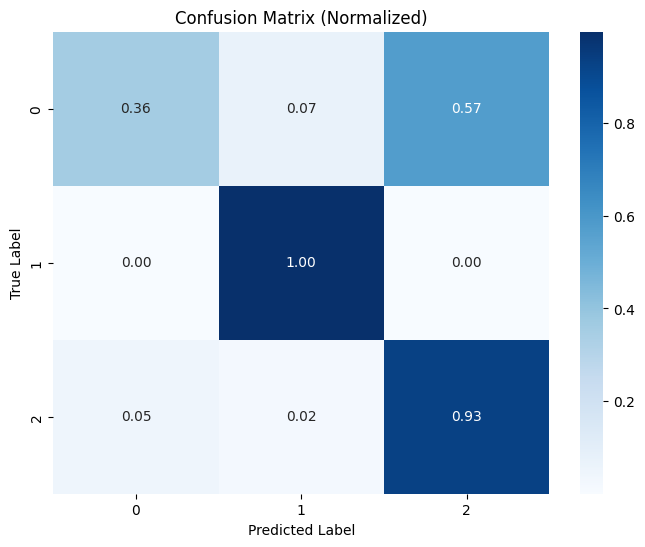

Feature Importance
9          ss_median   0.244002
8             rr_std   0.188475
0        diff_median   0.130104
7          rr_median   0.120681
10            ss_std   0.069771
3          num_peaks   0.068726
4        num_valleys   0.059885
2           dist_std   0.057292
1        dist_median   0.033968
5    first_peak_freq   0.013556
6   second_peak_freq    0.01354

Model  Iter  Valid Score  Test Score  \
0  random_forest     3     0.929663    0.931677   
1  random_forest     5     0.937097    0.932601   
0  decision_tree     3     0.889596    0.894888   
1  decision_tree     2     0.885521    0.892237   
2  decision_tree     5     0.883452    0.891033   
3  decision_tree     4     0.890714    0.882164   
0           LogR     3     0.800063    0.809126   
2  random_forest     2     0.931871    0.943105   
3  random_forest     1     0.939412    0.924911   
1           LogR     4     0.789039    0.806374   
4  random_forest     4     0.935922    0.915372   
2           LogR     1     0.799442    0.774732   
3           LogR     5     0.788635    0.822150   
4  decision_tree     1     0.897871    0.863826   
4           LogR     2     0.782537    0.842093   

                                         Model Parms  \
0  {'n_estimators': 50, 'min_samples_split': 2, '...   
1  {'n_estimators': 50, 'min_samples_split': 2, '...   
0  {'min_samples_split': 2, 'min_samples_leaf': 2...   
1  {'min_samples_split': 3, 'min_samples_leaf': 4...   
2  {'min_samples_split': 2, 'min_samples_leaf': 6...   
3  {'min_samples_split': 2, 'min_samples_leaf': 2...   
0  {'tol': 0.01, 'solver': 'saga', 'penalty': 'l1...   
2  {'n_estimators': 50, 'min_samples_split': 2, '...   
3  {'n_estimators': 50, 'min_samples_split': 2, '...   
1  {'tol': 1e-05, 'solver': 'saga', 'penalty': 'l...   
4  {'n_estimators': 50, 'min_samples_split': 4, '...   
2  {'tol': 1e-05, 'solver': 'saga', 'penalty': 'l...   
3  {'tol': 0.0001, 'solver': 'saga', 'penalty': '...   
4  {'min_samples_split': 2, 'min_samples_leaf': 2...   
4  {'tol': 0.001, 'solver': 'saga', 'penalty': 'l...   

                                                True  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
0  [Healthy, Healthy, Healthy, Healthy, Healthy, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1  [Healthy, Healthy, Healthy, Healthy, Healthy, ...   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [Healthy, Healthy, Healthy, Healthy, Healthy, ...   
3  [Healthy, Healthy, Healthy, Healthy, Healthy, ...   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4  [Healthy, Healthy, Healthy, Healthy, Healthy, ...   

                                           Predicted  Score_difference  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          0.002014  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          0.004496  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          0.005292  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          0.006716  
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          0.007581  
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          0.008550  
0  [Healthy, Healthy, Healthy, Healthy, Healthy, ...          0.009063  
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          0.011234  
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          0.014501  
1  [Healthy, Healthy, Healthy, Healthy, Healthy, ...          0.017335  
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          0.020550  
2  [Healthy, Healthy, Healthy, Healthy, Healthy, ...          0.024711  
3  [Healthy, Healthy, Healthy, Healthy, Healthy, ...          0.033514  
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          0.034045  
4  [Healthy, Healthy, Healthy, Healthy, Healthy, ...          0.059555

In [66]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

model_names=['decision_tree','LogR','random_forest']

X=samples_df.drop("Labels", axis=1).drop(samples_df.loc[samples_df["Labels"].isin(["Ventricular_Tachycardia", "Ventricular_Flutter_Fib", "Atrial_Fibrillation"])].index, axis=0)
X=X.fillna(0)
y_raw=samples_df["Labels"].drop(samples_df.loc[samples_df["Labels"].isin(["Ventricular_Tachycardia", "Ventricular_Flutter_Fib", "Atrial_Fibrillation"])].index, axis=0)
X.reset_index(inplace=True, drop=True)
y_raw.reset_index(inplace=True, drop=True)

hot_encoder = OneHotEncoder(sparse_output=False)
hot_encoded_labels = hot_encoder.fit_transform(np.array(y_raw).reshape(-1, 1))

label_encoder = LabelEncoder()
label_encoded_labels = label_encoder.fit_transform(np.array(y_raw).reshape(-1, 1))

best_models=[]
CV_datasets=[]
for model_name in model_names:
    if(model_name=="LogR"):
        y=y_raw
    else:
        y=label_encoded_labels
    trainer = MLModelTrainer(model_name=model_name, n_iter=5, cv=5)
    trainer.cross_validation(X,y)
    trainer.results()
    trainer.find_best_model()
    print(trainer.CV_dataset)
    print(trainer.best_model)
    best_models.append(trainer.best_model)
    trainer.plot_confusion_matrix()
    try:
        print(label_encoder.inverse_transform([0, 1, 2, 3, 4, 5]))
    except:
        pass
    importances=trainer.get_importances()
    display(importances)
    importances.to_excel(model_name+'_importances.xlsx')
    CV_datasets.append(trainer.CV_dataset)
    trainer.CV_dataset.to_pickle(model_name+".pkl", compression='infer', protocol=5, storage_options=None) # save dataframe as pickle file
    with open(model_name+'_model.pkl', 'wb') as file: # Save the Model to pickle file
              pickle.dump(trainer.best_model, file)
combined_datasets=pd.concat(CV_datasets, axis=0)
model_col=[]
for j, m in enumerate(model_names):
    for i in range(5):
        model_col.append(m)
combined_datasets.insert(0,"Model",model_col)
combined_datasets.sort_values(by=['Score_difference', 'Test Score'], ascending=[True, False], inplace=True)
display(combined_datasets)
combined_datasets.to_excel("results.xlsx")

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


X=samples_df.drop("Labels", axis=1)
X=X.fillna(0)
y_raw=samples_df["Labels"]

hot_encoder = OneHotEncoder(sparse_output=False)
hot_encoded_labels = hot_encoder.fit_transform(np.array(y_raw).reshape(-1, 1))

label_encoder = LabelEncoder()
label_encoded_labels = label_encoder.fit_transform(np.array(y_raw).reshape(-1, 1))

best_models=[]
CV_datasets=[]
model_name="decision_tree"
if(model_name=="LogR"):
    y=y_raw
else:
    y=label_encoded_labels
trainer = MLModelTrainer(model_name=model_name, n_iter=5, cv=5)
trainer.cross_validation(X,y)
trainer.results()
trainer.find_best_model()
print(trainer.CV_dataset)
print(trainer.best_model)
best_models.append(trainer.best_model)
trainer.plot_confusion_matrix()
importances=trainer.get_importances()
display(importances)
importances.to_excel(model_name+'_importances.xlsx')
CV_datasets.append(trainer.CV_dataset)
trainer.CV_dataset.to_pickle(model_name+".pkl", compression='infer', protocol=5, storage_options=None) # save dataframe as pickle file
with open(model_name+'_model.pkl', 'wb') as file: # Save the Model to pickle file
          pickle.dump(trainer.best_model, file)
combined_datasets=pd.concat(CV_datasets, axis=0)
model_col=[]
for j, m in enumerate(model_names):
    for i in range(5):
        model_col.append(m)
combined_datasets.insert(0,"Model",model_col)
combined_datasets.sort_values(by=['Score_difference', 'Test Score'], ascending=[True, False], inplace=True)
display(combined_datasets)
combined_datasets.to_excel("results.xlsx")